# Introduction

### SmartTech Co. wants to create a machine learning model to predict laptop prices accurately. This project will study different laptop features, brands, and market trends to improve pricing decisions. The goal is to help SmartTech Co. stay competitive with smart, data-driven pricing strategies.

# Objectives

### Accurate Price Prediction – Develop a machine learning model to predict laptop prices based on specifications and brand influence.
### Market Positioning – Help SmartTech Co. understand key pricing factors to stay competitive in the market.
### Brand Impact Analysis – Assess how different brands affect laptop pricing and customer perception.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [ ]:
df = pd.read_csv('/content/laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

# Data Cleaning

So we can see that there is column named "Unnamed: 0", which is a unnecessary data for this project. So we can drop the column from the dataset.

In [ ]:
# Using drop function to
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Unnamed: 0.1,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# Using drop function to
df = df.drop(['Unnamed: 0.1'], axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
print(df.columns)  # Display all column names

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
df.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [ ]:
df.describe(include="all")

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273.000000
unique,19,6,25,40,118,10,40,110,9,189,NaN
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,290,710,640,495,183,601,401,271,1047,111,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59955.814073
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37332.251005
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9270.720000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31914.720000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52161.120000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79333.387200


In [ ]:
# Checking if the dataset has any null values in it
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum() #count all values

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


We can observe that there is no null values in the dataset

Below line shows that we are checking for the duplicated rows in the dataset and sum the number of those duplicated rows

In [ ]:
print(df.duplicated().sum())
print(df.shape)

29
(1273, 11)


Using drop_duplicates we droped the duplicated rows in the dataset

In [ ]:
df = df.drop_duplicates()
df.shape

(1244, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   object 
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   object 
 10  Price             1244 non-null   float64
dtypes: float64(1), object(10)
memory usage: 116.6+ KB


Next, using the information from the dataset, here we can categorize the data into numerical and categorical values to differentiate the features for analysis. This distinction will help us analyze the data more effectively.

In [ ]:
# Separating categorical and numerical values
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
        'Memory', 'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Price'], dtype='object'))

Now, we are gathering information about all the columns in the dataset and checking the number of values present in each column.

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

# Calling uniquevals function
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
---------------------------------------------------------------------------
Details of the particular col Inches is : ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'


On observation, we can see that by removing "GB" from RAM, we can convert it into an integer. The same approach applies to Memory and Weight. For Weight, we can classify it as a floating variable using `str.replace()`, as shown below.

In [ ]:
# Convert 'Ram' and 'Weight' columns to string first
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=True)
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=True)

# Replace non-numeric values ('?') with NaN and convert to numeric types
df['Ram'] = pd.to_numeric(df['Ram'], errors='coerce').astype('Int32')  # Convert to integer
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce').astype('float32')  # Convert to float

# Handle missing values (fill with median or another strategy)
df['Ram'].fillna(df['Ram'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   Int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
dtypes: Int32(1), float32(1), float64(1), object(8)
memory usage: 108.1+ KB


# Exploratory Data Analysis

### EDA is the process of exploring and analyzing a dataset to understand its structure, patterns, and relationships before applying machine learning.



# Price Distribution plot

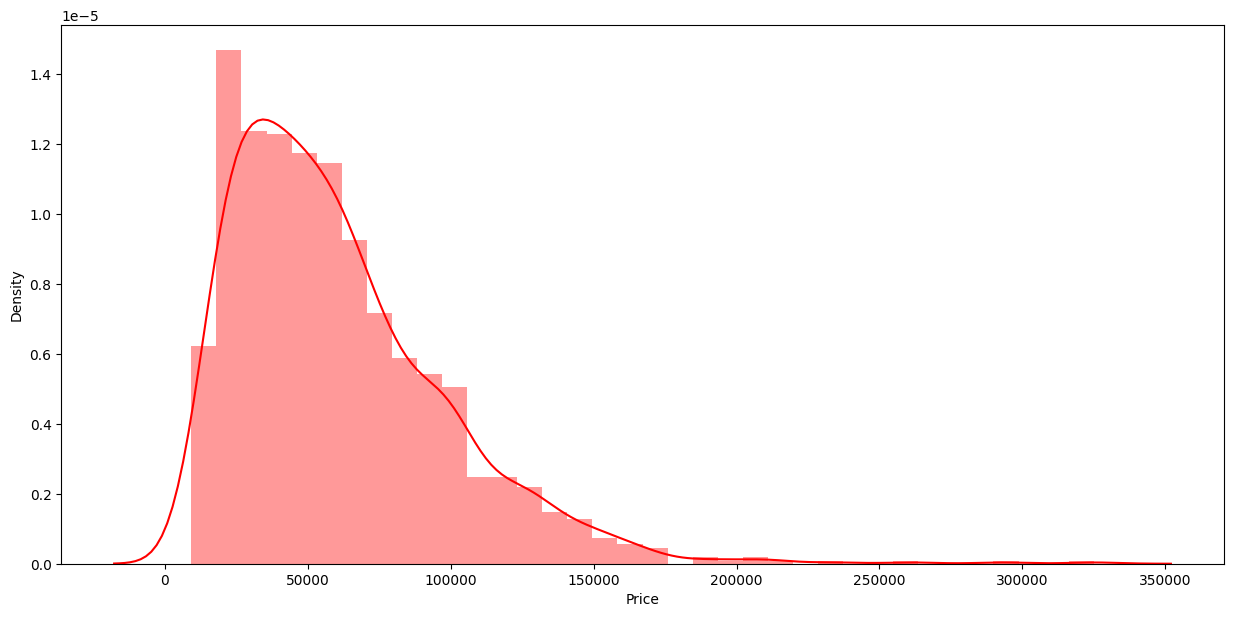

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'],color='red')
plt.show()

# Countplot for Categorical variables
### This function draws count plots for different categorical columns in the dataset

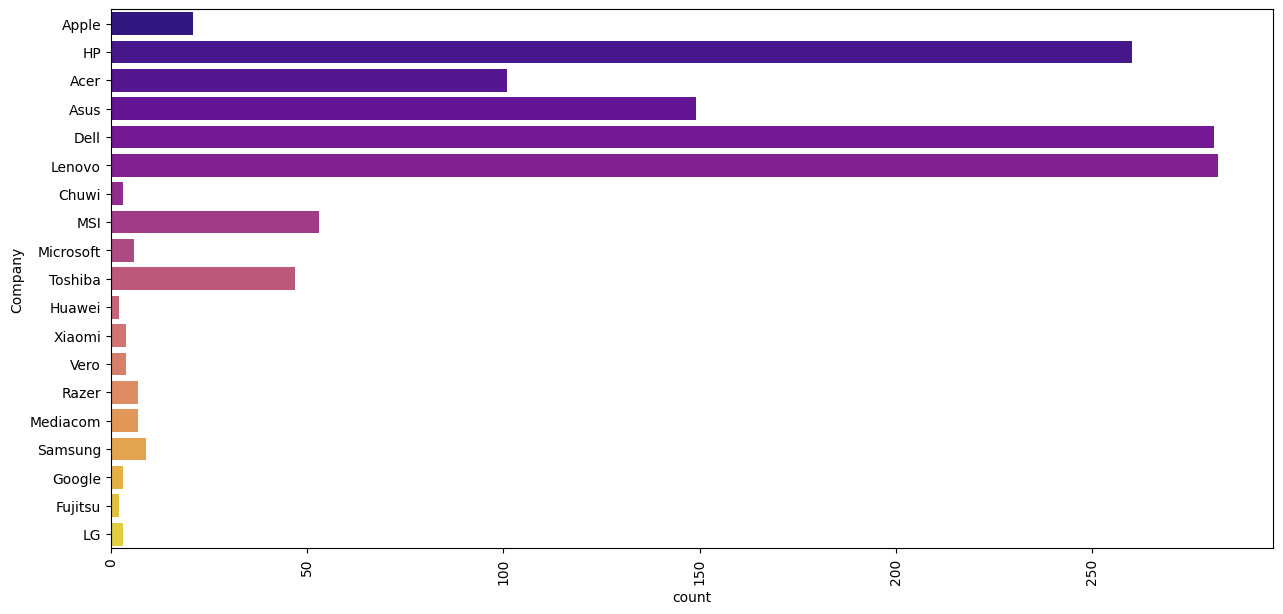

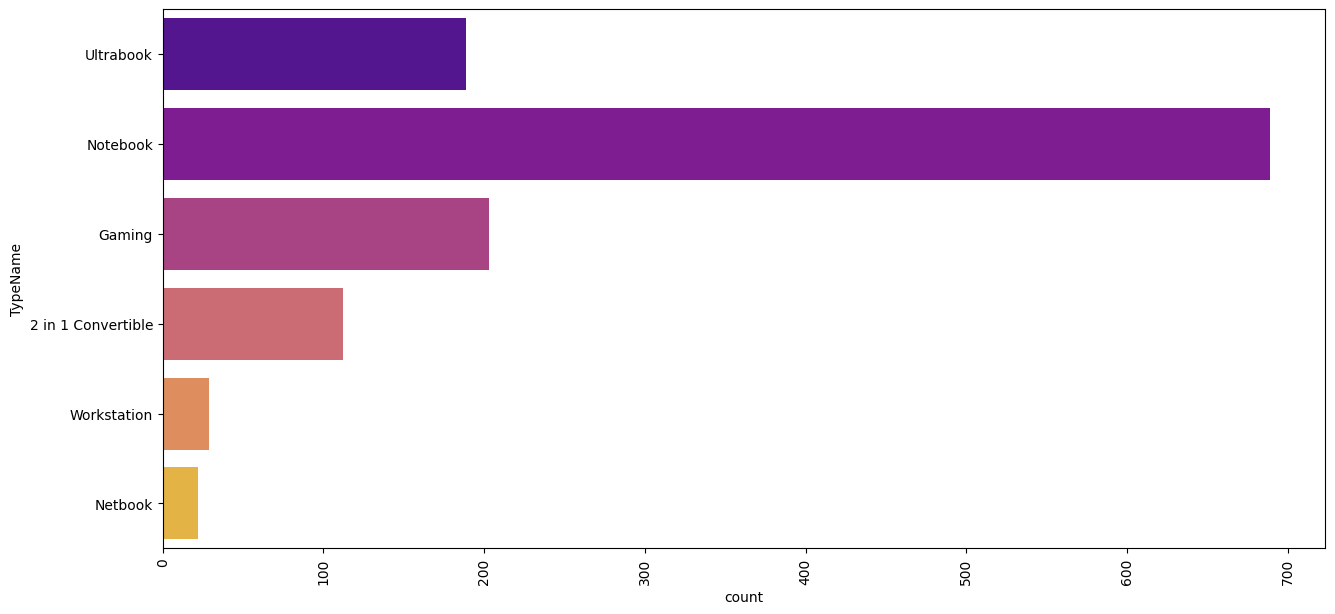

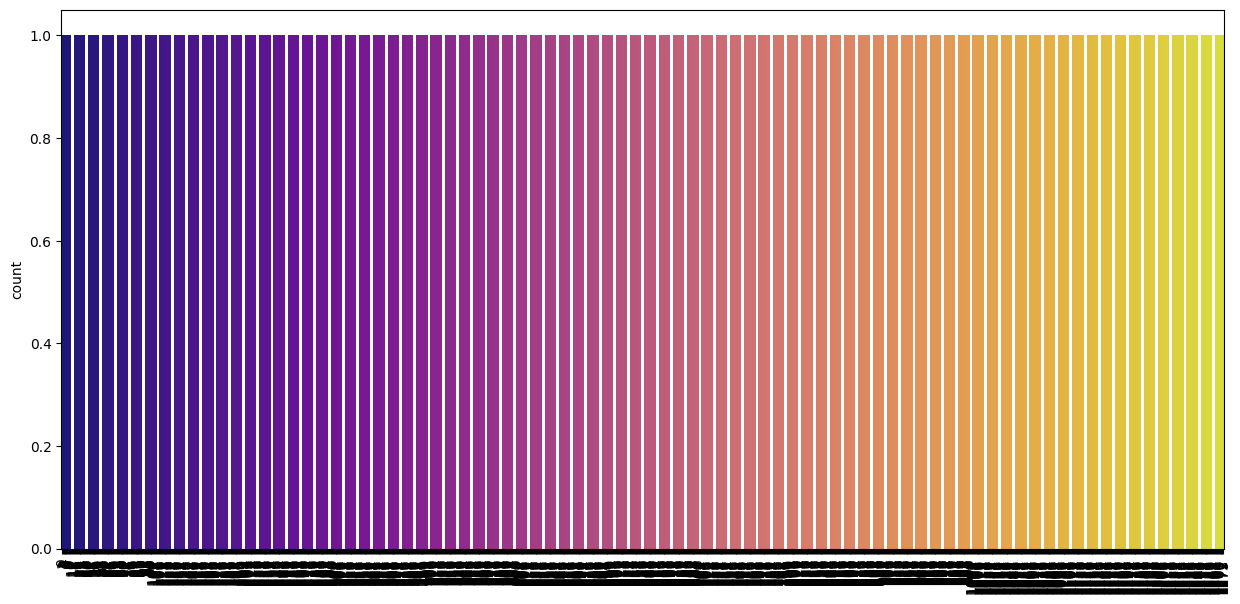

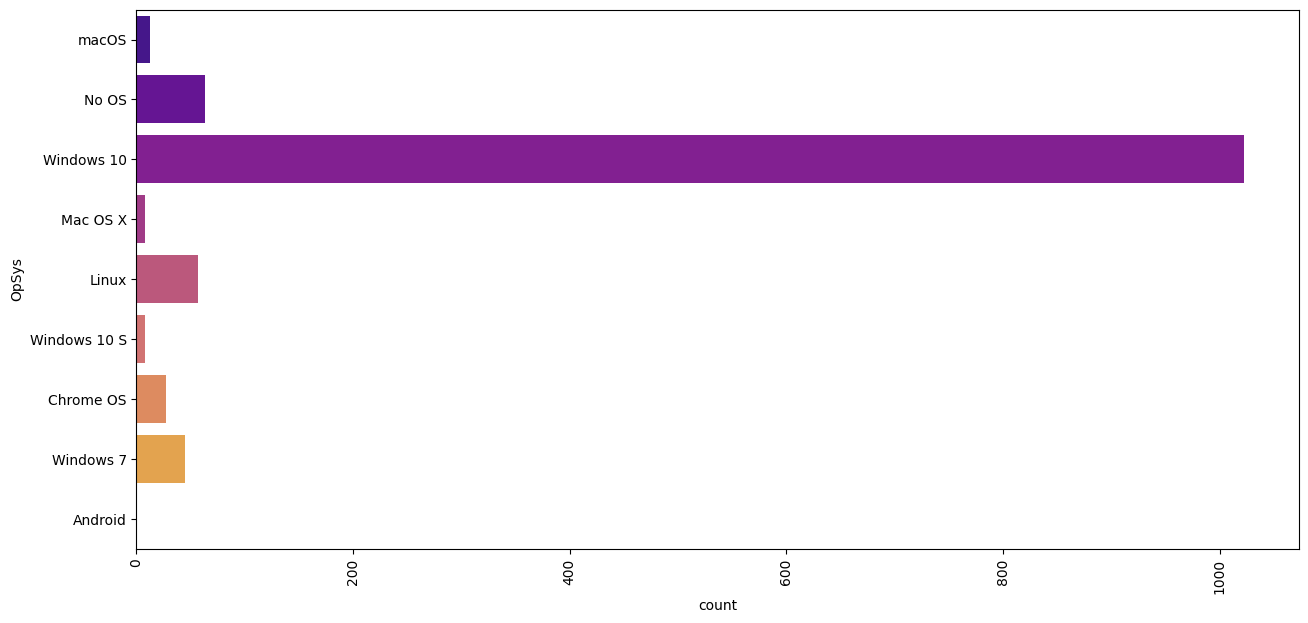

In [ ]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')

toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

# Barplot - Average price for each Laptop brands

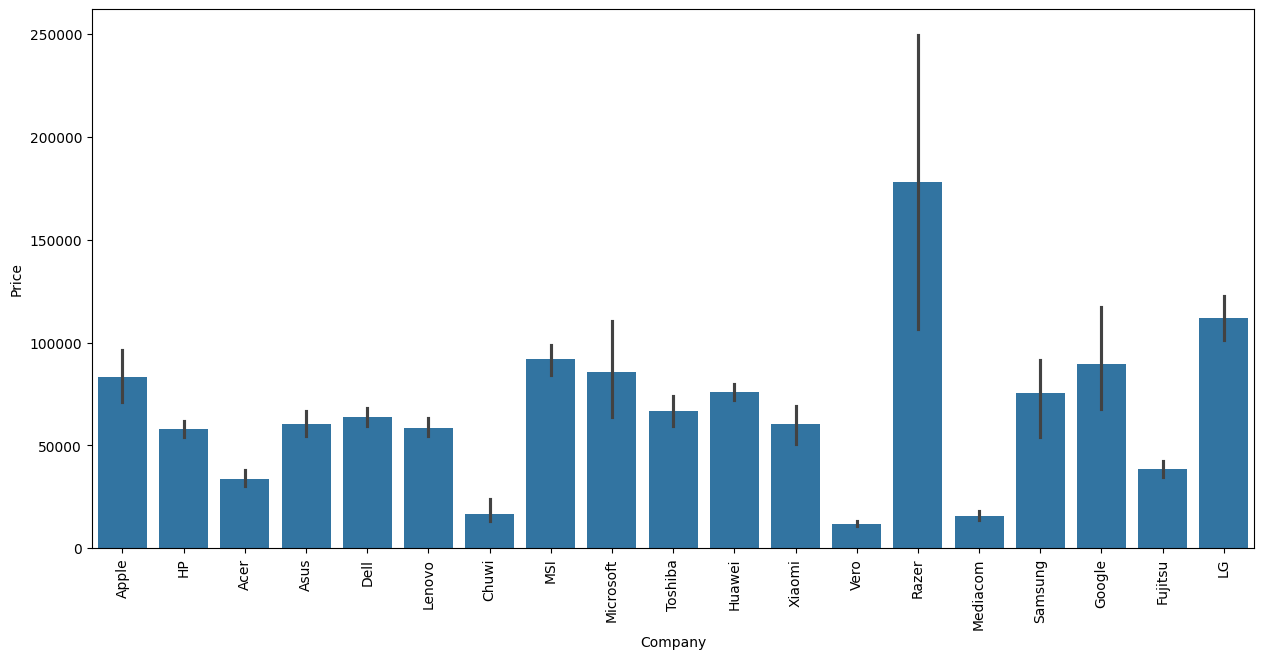

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Countplot for Laptop types

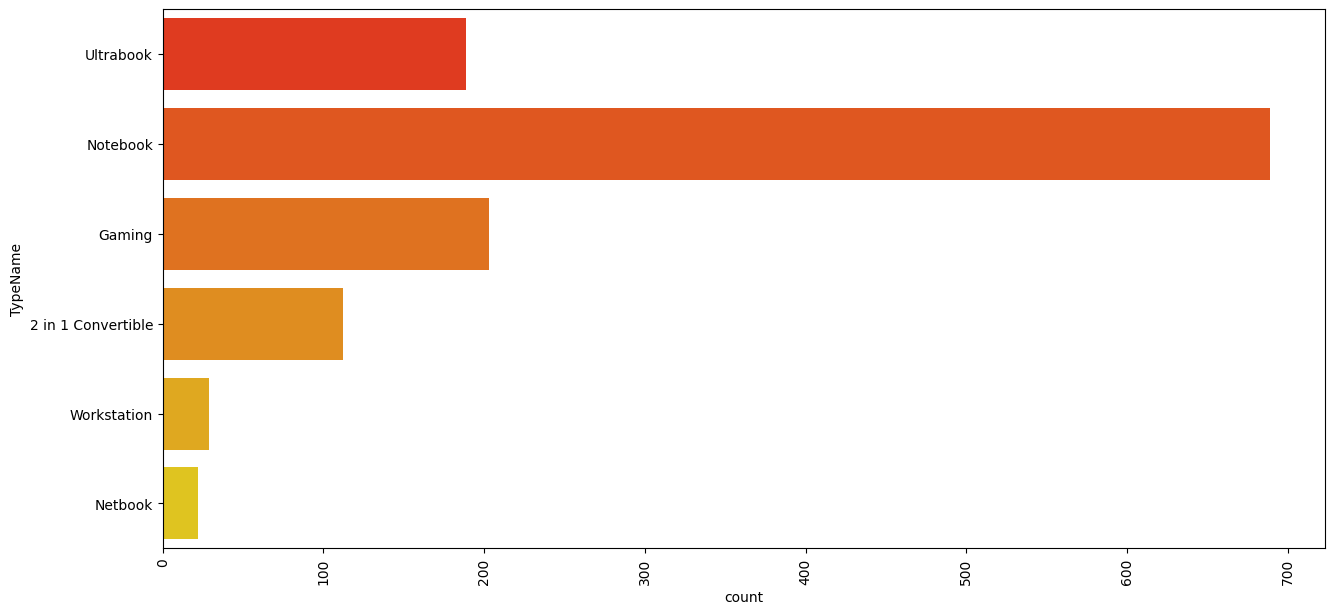

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')
plt.show()

# Barplot - Price variation on each Laptop type

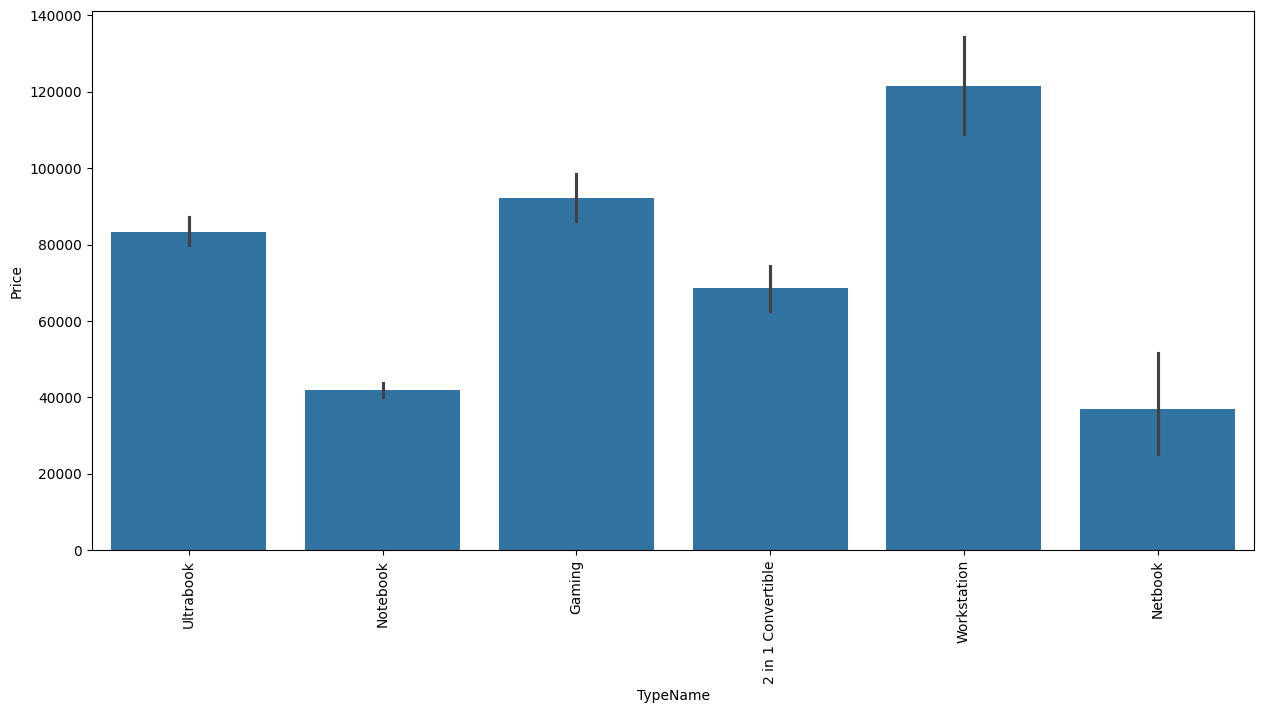

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Scatterplot - Price variation for different inches of laptops

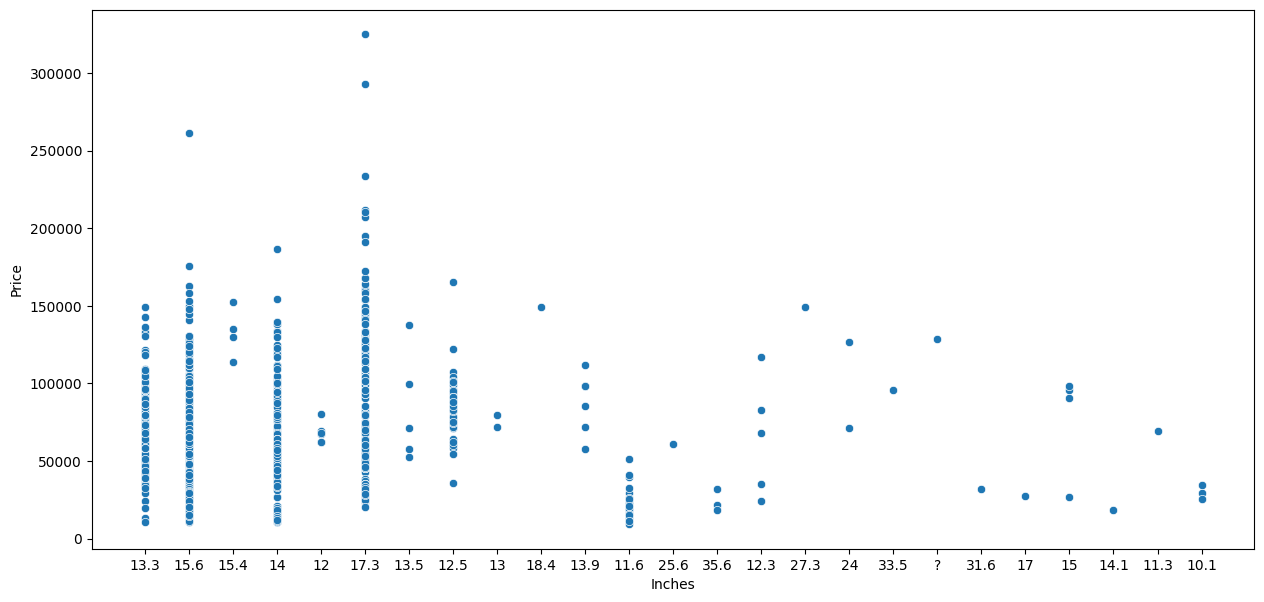

In [ ]:
plt.figure(figsize=(15,7))
sn.scatterplot(x = df['Inches'],y = df['Price'])
plt.show()

In data analysis, outliers can often be ignored, as they usually have minimal impact on the general visualization of the data.

# Screen Resolution feature analysis

For the `Screen Resolution` column, there are various types of screen resolutions. We can categorize them based on three key aspects: `Touch Screen`, `Normal`, and `IPS Panel`. This segregation will help in better analysis.

In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,493
1366x768,255
IPS Panel Full HD 1920x1080,222
IPS Panel Full HD / Touchscreen 1920x1080,50
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


# Creating new column - Touchscreen

In [ ]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
505,Lenovo,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.44,50562.72,0
1033,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.95,63669.60,0
789,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.62,52480.80,0
489,Asus,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,0.91,103896.00,0
586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.44,0
276,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,58554.72,0
543,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517.44,0
850,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,No OS,1.86,15930.72,0
600,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,64948.32,0
1211,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,93186.72,0


In this column *'0'* represents not a touch screen latop and *'1'* represents its a touch screen laptop

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1129,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.35,60153.1200,0
721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,44574.0480,1
174,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.50,49177.4400,0
807,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04,33513.1200,0
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0


# Countplot for Touchscreen laptops

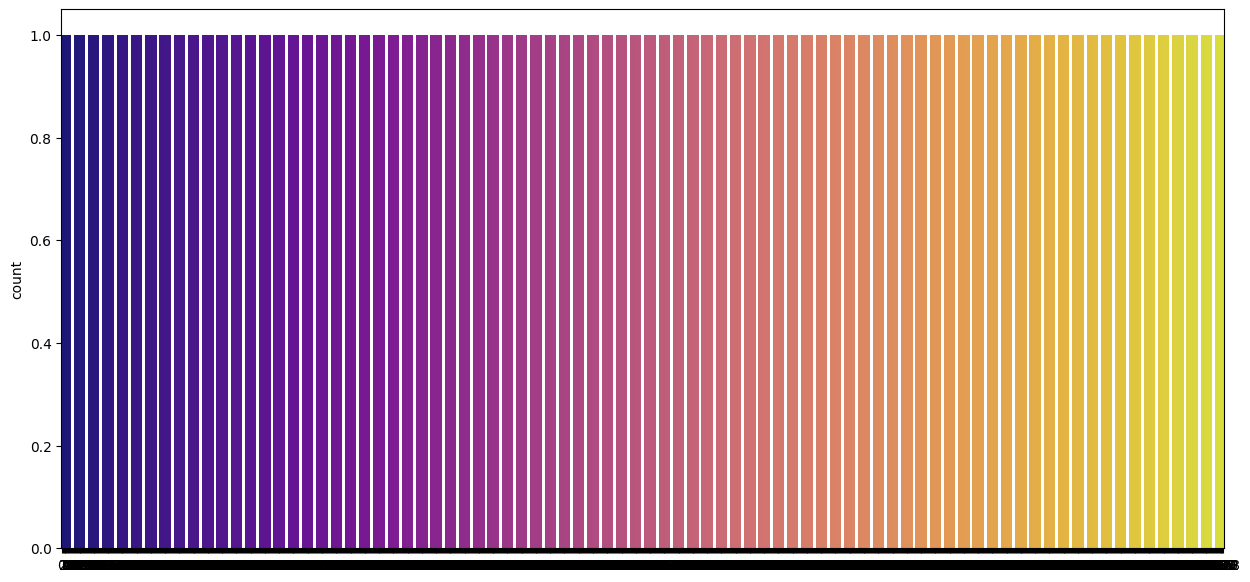

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['TouchScreen'],palette='plasma')
plt.show()

# Barplot - Price variation on Touch screen laptops

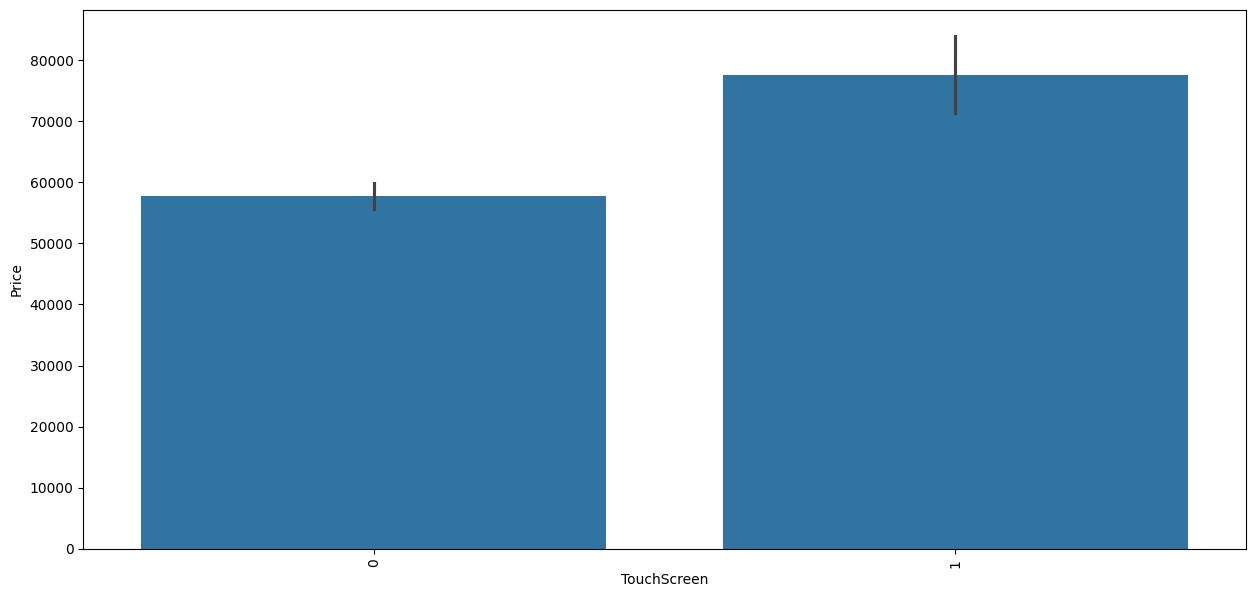

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Creating new column - IPS

In [ ]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
502,Lenovo,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.40,85194.720,1,1
528,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.30,31168.800,0,0
779,Asus,Notebook,15.6,1920x1080,Intel Pentium Dual Core N4200 1.1GHz,8,128GB SSD,Intel HD Graphics 505,Windows 10,2.00,31003.632,0,0
341,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,12,2TB HDD,AMD Radeon 530,Windows 10,2.20,47898.720,0,0
1122,HP,Notebook,14,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.43,80612.640,0,0


# Countplot for IPS laptops

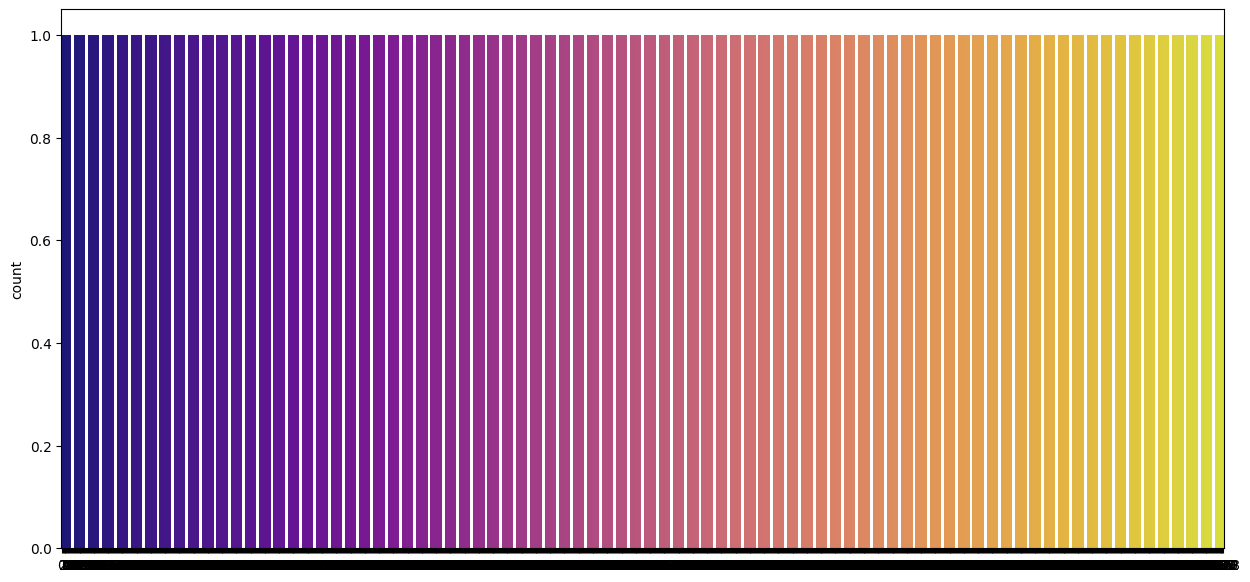

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['IPS'],palette='plasma')
plt.show()

# Barplot - Price variation with respect to IPS laptops

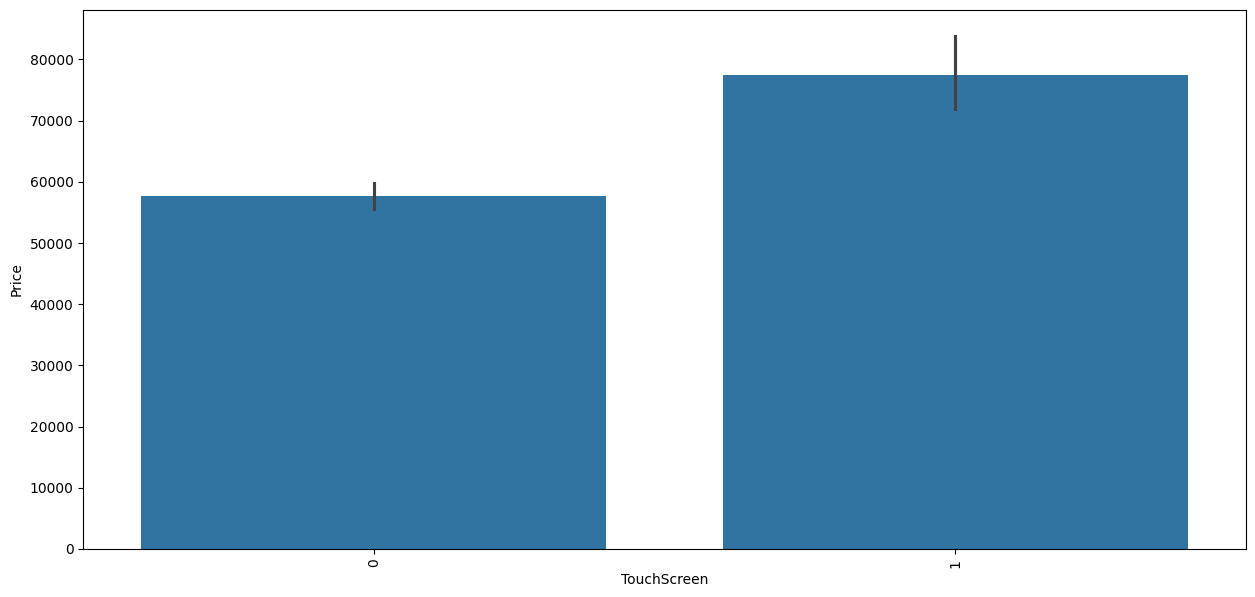

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# Feature Engineering

Extracting X Resolution and Y Resolution
We will extract the X and Y resolutions from the Screen Resolution column to analyze them separately and gain better insights

We will split the text at the letter "x" to separate the two parts. From this, we can identify one column as Y resolution. Additionally, we need to perform feature engineering on the X resolution column for better analysis.

In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
1162,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.72,0,1,IPS Panel Full HD 1920,1080
1195,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.56,0,1,IPS Panel Full HD 1920,1080
1208,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,33513.12,0,0,1600,900
871,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,2.20,25521.12,0,0,Full HD 1920,1080
401,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.90,81465.12,0,0,Full HD 1920,1080


here ,str.findall() function in Pandas is used with .str to extract all occurrences of a pattern in a string using regular expressions

In [ ]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
152,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.90,26533.44,0,0,1366,768
1102,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core 3205U 1.5GHz,4,16GB SSD,Intel HD Graphics,Chrome OS,2.20,11135.52,0,0,1366,768
906,HP,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.26,79014.24,0,0,1920,1080
1028,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,86526.72,1,0,3200,1800
599,Dell,Workstation,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M620,Windows 10,2.06,93932.64,1,0,1920,1080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   Int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  TouchScreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  X_res             1244 non-null   object 
 14  Y_res             1244 non-null   object 
dtypes: Int32(1), float32(1), float64(1), int64(2), object(10)
memory usage: 147.0+ KB


This code converts the X_res and Y_res columns in a Pandas DataFrame (df) to integer (int) data type and then displays information about the DataFrame.

Displays details about the dataset, including:
* Column names
* Data types (int64, float64, object, etc.)
* Number of non-null values


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1244 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1244 non-null   object 
 1   TypeName          1244 non-null   object 
 2   Inches            1244 non-null   object 
 3   ScreenResolution  1244 non-null   object 
 4   Cpu               1244 non-null   object 
 5   Ram               1244 non-null   Int32  
 6   Memory            1244 non-null   object 
 7   Gpu               1244 non-null   object 
 8   OpSys             1244 non-null   object 
 9   Weight            1244 non-null   float32
 10  Price             1244 non-null   float64
 11  TouchScreen       1244 non-null   int64  
 12  IPS               1244 non-null   int64  
 13  X_res             1244 non-null   int64  
 14  Y_res             1244 non-null   int64  
dtypes: Int32(1), float32(1), float64(1), int64(4), object(8)
memory usage: 147.0+ KB


# Heatmap - Correlation between all features

A heatmap is a visual representation of the correlation between different numerical features in a dataset

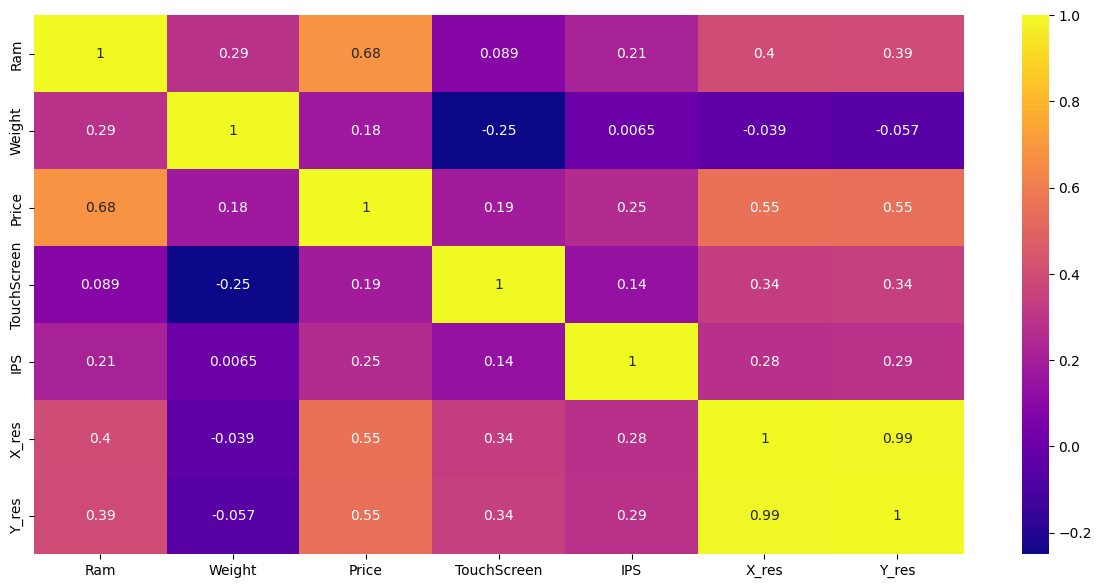

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='plasma')
plt.show()


This code computes and displays how strongly each numerical feature correlates with Price.



In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlation with 'Price'
correlation_with_price = numerical_df.corr()['Price'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_price)


Price          1.000000
Ram            0.681922
X_res          0.553040
Y_res          0.549308
IPS            0.252956
TouchScreen    0.186393
Weight         0.176330
Name: Price, dtype: float64


# Creating PPI(pixel per inch) column in the dataset

From the correlation plot, we observed that as `X_res` and `Y_res` increase, the laptop price also tends to rise. This indicates a **positive correlation** between resolution and price. Since `X_res` and `Y_res` provide valuable information, we split the `Resolution` column into these two separate features for better analysis.

To enhance our analysis, we can create a new column called PPI (Pixels Per Inch). Since X_res and Y_res show high collinearity, we can combine them with Inches, which has lower collinearity. This will help us capture the display sharpness in a single feature.

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

This formula calculates the pixel density by using the Pythagorean theorem to find the diagonal resolution and then dividing it by the screen size in inches.

# Heatmap - After adding PPI

In [ ]:
print(df['ScreenResolution'].head(10))  # Check first 10 values


0    IPS Panel Retina Display 2560x1600
1                              1440x900
2                     Full HD 1920x1080
3    IPS Panel Retina Display 2880x1800
4    IPS Panel Retina Display 2560x1600
5                              1366x768
6    IPS Panel Retina Display 2880x1800
7                              1440x900
8                     Full HD 1920x1080
9           IPS Panel Full HD 1920x1080
Name: ScreenResolution, dtype: object


dropna() → Drops missing values (NaN) from the DataFrame.

In [ ]:
df = df.dropna(subset=['ScreenResolution'])


This code cleans and processes laptop screen resolution data, extracts numerical values, and calculates PPI (Pixels Per Inch).



In [ ]:
# Replace '?' with NaN and convert 'Inches' to float
df['Inches'] = df['Inches'].replace('?', None).astype('float32')

# Drop rows where 'Inches' is still NaN
df = df.dropna(subset=['Inches'])

# Extract X and Y resolution from 'ScreenResolution' column
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)').astype('int32')

# Calculate PPI
df['PPI'] = (((df['X_res']**2 + df['Y_res']**2) ** 0.5) / df['Inches']).astype('float32')

df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983002
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211990
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534622
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983002


# Heatmap - After adding PPI


here,visualizes correlations between all numerical features using a heatmap.



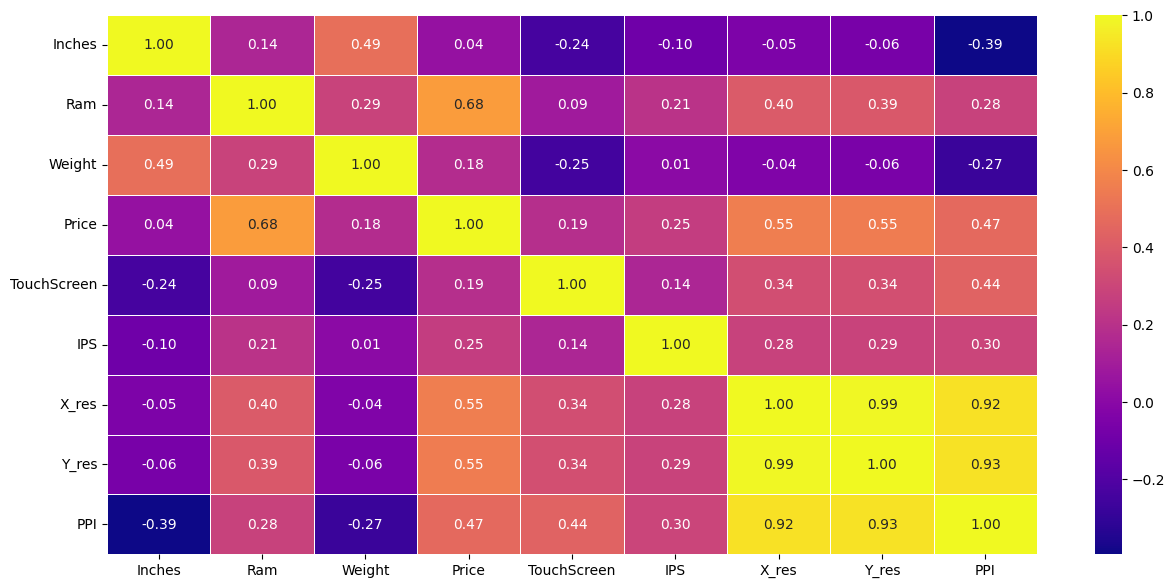

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)

plt.show()


it identifies which numerical features are most strongly related to Price.



In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'int32', 'float64', 'float32'])

# Compute correlation with 'Price'
correlation_with_price = numerical_df.corr()['Price'].sort_values(ascending=False)

# Display correlation values
print(correlation_with_price)


Price          1.000000
Ram            0.682963
X_res          0.553711
Y_res          0.550002
PPI            0.465485
IPS            0.254244
TouchScreen    0.187253
Weight         0.177110
Inches         0.042483
Name: Price, dtype: float64


Since we observed from the correlation data that `PPI` has a strong correlation with price, we will use it as a feature. Since `PPI` is derived from `Inches`, `X_res`, and `Y_res`, and it collectively represents these three columns, we will drop `Inches`, `X_res`, and `Y_res` from the dataset.

In [ ]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002


# CPU Analysis

Now we will work on CPU column,as that also has much text data and we need to process it efficiently as we may get good insights from them

In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,141
Intel Core i7 7500U 2.7GHz,126
Intel Core i7 8550U 1.8GHz,72
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i5 6440HQ 2.6GHz,1
AMD A6-Series 7310 2GHz,1


Since most common processors are made by Intel, we can categorize them into different groups like i5, i7, and other.

i5 & i7: Represent mid-range and high-performance Intel processors.
Other: Includes Intel processors that do not belong to the i3, i5, or i7 series (e.g., Pentium, Celeron, Atom, etc.).
AMD: Since AMD processors are entirely different, they will be grouped separately.

Extracting the First Three Words of the CPU Column
To achieve this, we need to extract the first three words from the CPU column because they typically represent the processor type. We will use string manipulation techniques to achieve this

In [ ]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions we will return them as it is,but if we get any other processor we will first check whether is that a variant of the intel? or not if yes,then we will tag it as "Other Intel Processor" else we will say it as `AMD Processor`

In [ ]:
def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


# Countplot for number of CPUs

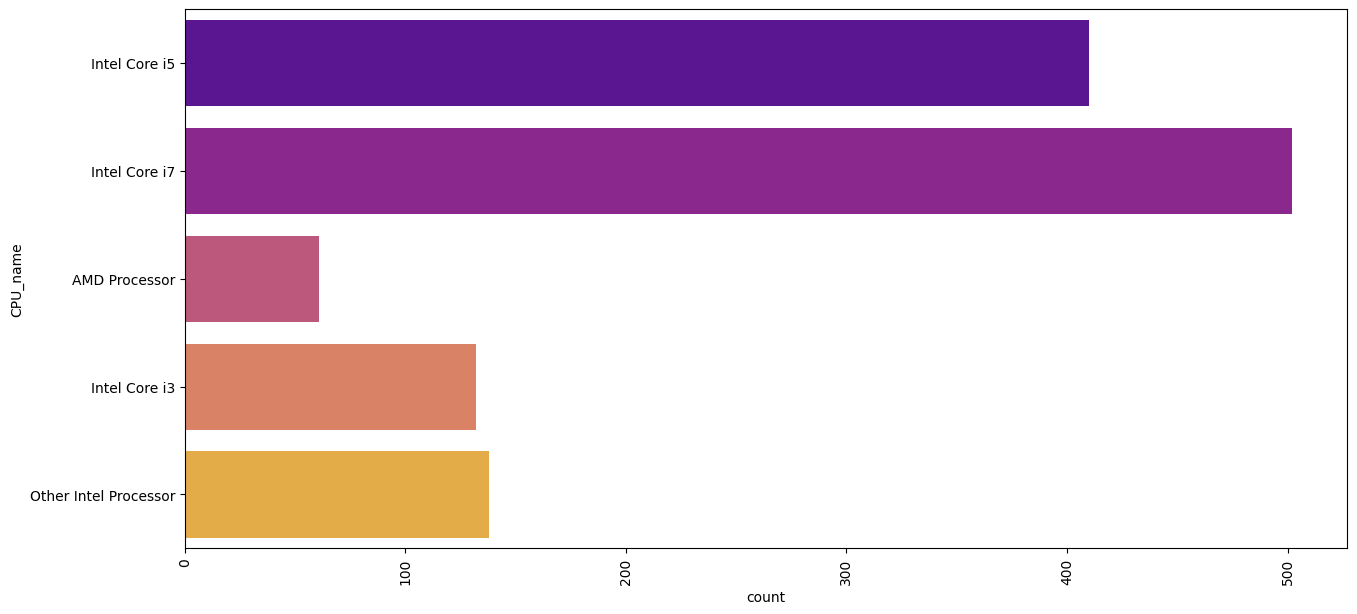

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# Barplot - Price vs CPU variation

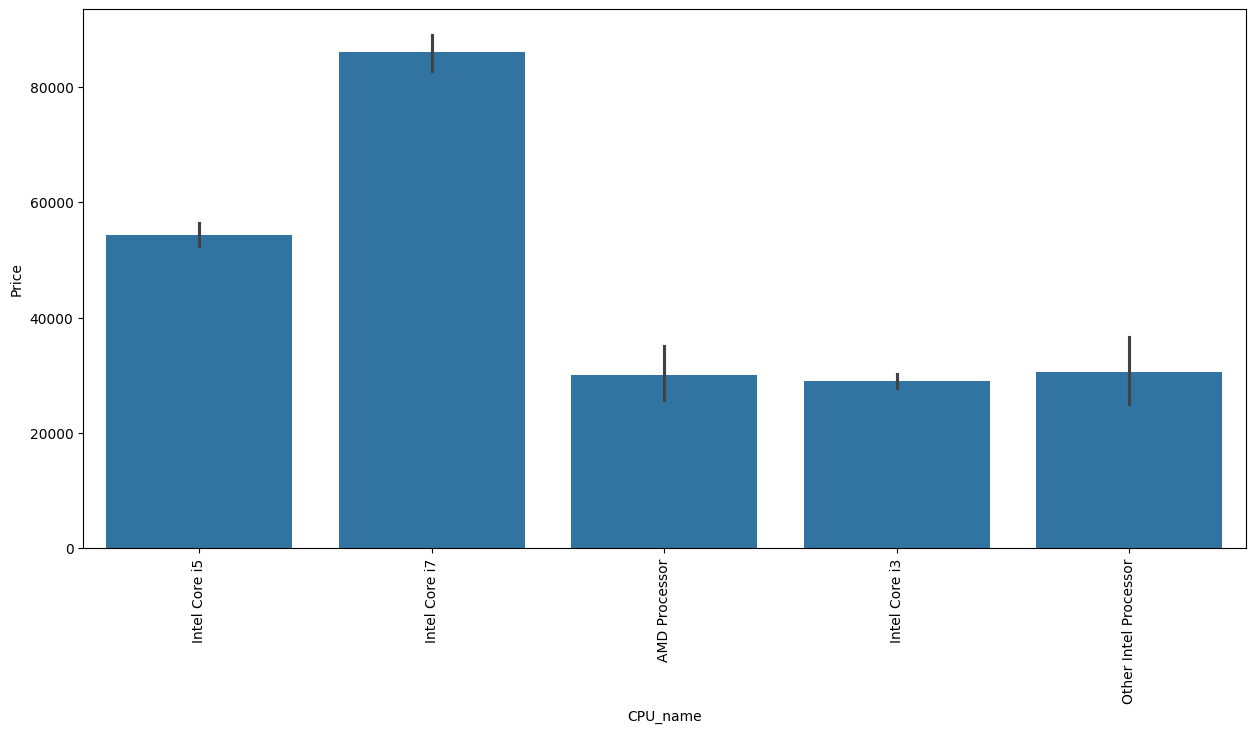

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Use keyword arguments 'x' and 'y' instead of positional arguments
sns.barplot(x=df['CPU_name'], y=df['Price'])

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

plt.show()


We can safely drop the old CPU column from the dataset

In [ ]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5


# Analysis on the RAM column

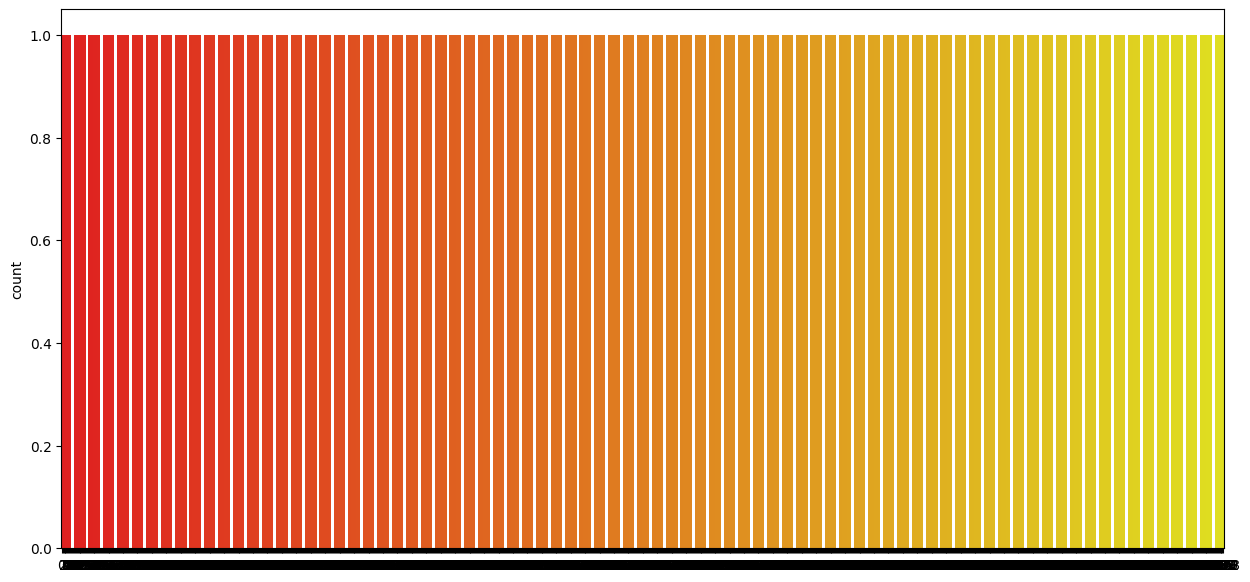

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['Ram'],palette='autumn')
plt.show()

# Barplot - Price vs RAM

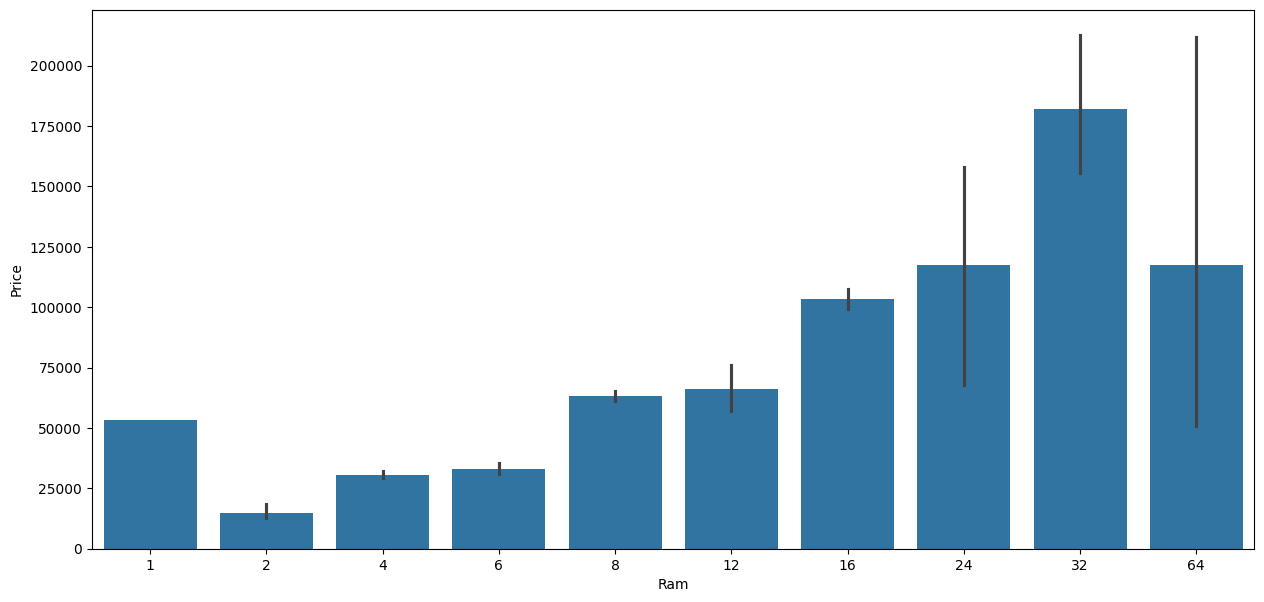

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

# Use keyword arguments x and y
sns.barplot(x=df['Ram'], y=df['Price'])

plt.show()


**RAM is having good relation with Price**

# About the memory column

We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part

This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown

In [ ]:
df['Memory'].iloc[:1][0]

'128GB SSD'

We have different categories and also different kinds of variations

In [ ]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,400
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In here, we will do as follows,
* Four most common variants observed: HDD, SSD, Flash, Hybrid
* We will remove decimal space for example 1.0 TB will become 1TB
* We will replace the word GB with ""
* We will replace the word TB with "000"
* we will split the word across the "+" character

cleans the Memory column by converting it into a consistent numerical format and then splits it if it contains multiple storage types.



In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split("+",n = 1,expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


here we strip up all the white spaces, basically eliminating white spaces

In [ ]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,256 SSD


# Creating Layer 1 column for each memory type

Checks if the storage type exists in the first column:
If present, assigns 1.
If not, assigns 0.

In [ ]:
def applychanges(value):

    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)


df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,256 SSD,0,1,0,0


We will remove all the character and just keeping the numbers

In [ ]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

,count
first,
256 SSD,486
1000 HDD,211
128 SSD,166
512 SSD,132
500 HDD,121
32 Flash Storage,35
2000 HDD,16
1000 SSD,15
64 Flash Storage,13


here,creates a new column Second to store the second storage type

In [ ]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,128 SSD,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5,256 SSD,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,512 SSD,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,256 SSD,0,1,0,0,None


# Creating Layer 2 column for each memory type

This code creates new binary (0/1) columns to indicate whether the secondary storage (Second column) contains HDD, SSD, Hybrid, or FlashStorag

In [ ]:
def applychanges1(value):

    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)


listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

We will remove all the characters and just keeping the numbers again

In [ ]:
df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

,count
Second,
0,1039
1000 HDD,181
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


This code extracts numerical values from the first and Second storage columns, converts them to integers, and fills missing values.



In [ ]:
# Remove non-numeric characters and convert to numeric (handling NaN)
df['first'] = pd.to_numeric(df['first'].str.extract(r'(\d+)')[0], errors='coerce')
df['Second'] = pd.to_numeric(df['Second'].str.extract(r'(\d+)')[0], errors='coerce')

# Fill NaN values with 0 or another suitable value
df['first'].fillna(0, inplace=True)
df['Second'].fillna(0, inplace=True)

# Convert to integer
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')

df.head()


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


# Multiplying the elements and storing in subsequent columns

To compute the total storage capacity (by multiplying primary and secondary storage values) and store the result in a new colum


In [ ]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

Dropping unecessary columns

In [ ]:
df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
345,Lenovo,Gaming,16,256 SSD + 2000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.1200,0,1,141.211990,Intel Core i7,2000,256,0,0
808,Dell,Gaming,16,512 SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,89457.1200,0,0,282.423981,Intel Core i7,0,512,0,0
1164,HP,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,2.10,25414.0272,0,0,100.454666,Intel Core i5,500,0,0,0
1062,Dell,Notebook,4,1000 HDD,Intel HD Graphics,Windows 10,2.25,29783.5200,0,0,141.211990,Intel Core i5,1000,0,0,0
568,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 505,Windows 10,2.20,18328.3200,0,0,141.211990,Other Intel Processor,500,0,0,0


drop memory column

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
965,Dell,Notebook,4,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,100.454666,Intel Core i3,1000,0,0,0
72,Dell,Notebook,8,AMD Radeon 530,Windows 10,2.20,46353.6000,0,0,141.211990,Intel Core i7,0,256,0,0
482,HP,Notebook,4,Intel UHD Graphics 620,Windows 10,1.49,38681.2800,0,1,165.632111,Intel Core i5,0,128,0,0
462,Asus,Notebook,8,Intel HD Graphics 620,Windows 10,2.37,39906.7200,0,0,141.211990,Intel Core i5,1000,0,0,0
369,HP,Ultrabook,8,Intel HD Graphics 620,Windows 10,1.36,93240.0000,0,1,157.350510,Intel Core i7,0,256,0,0


In [ ]:
# Drop non-numeric columns before calculating correlation
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation with 'Price'
price_correlation = df_numeric.corr()['Price']

print(price_correlation)


Ram              0.682963
Weight           0.177110
Price            1.000000
TouchScreen      0.187253
IPS              0.254244
PPI              0.465485
HDD             -0.096006
SSD              0.667898
Hybrid           0.022664
Flash_Storage         NaN
Name: Price, dtype: float64


Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [ ]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256


# Analysis on GPU

The Graphics Processing Unit (GPU) plays a significant role in determining a laptop’s performance and price.

In [ ]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,269
Intel HD Graphics 520,177
Intel UHD Graphics 620,66
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


Since we have limited data on laptops, it's more beneficial to focus on GPU brands rather than specific GPU models or values. This will help in categorizing GPUs efficiently without adding unnecessary complexity

# Extracting the GPU brands

Since the GPU column contains both brand and model names, we need to extract just the brand (e.g., "Nvidia", "Intel", "AMD").



Splits each GPU name into words and takes the first word (brand).

In [ ]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


This code extracts the GPU brand from the Gpu column and visualizes its distribution using a count plot.



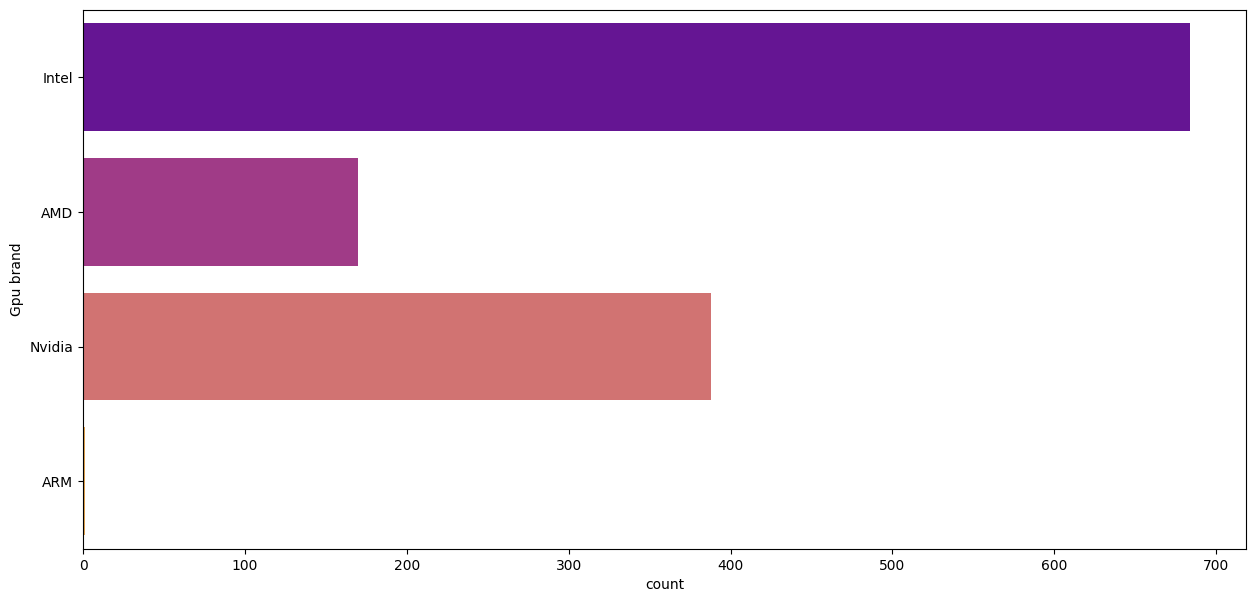

In [ ]:
plt.figure(figsize=(15,7))
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

Removing ARM Tuple

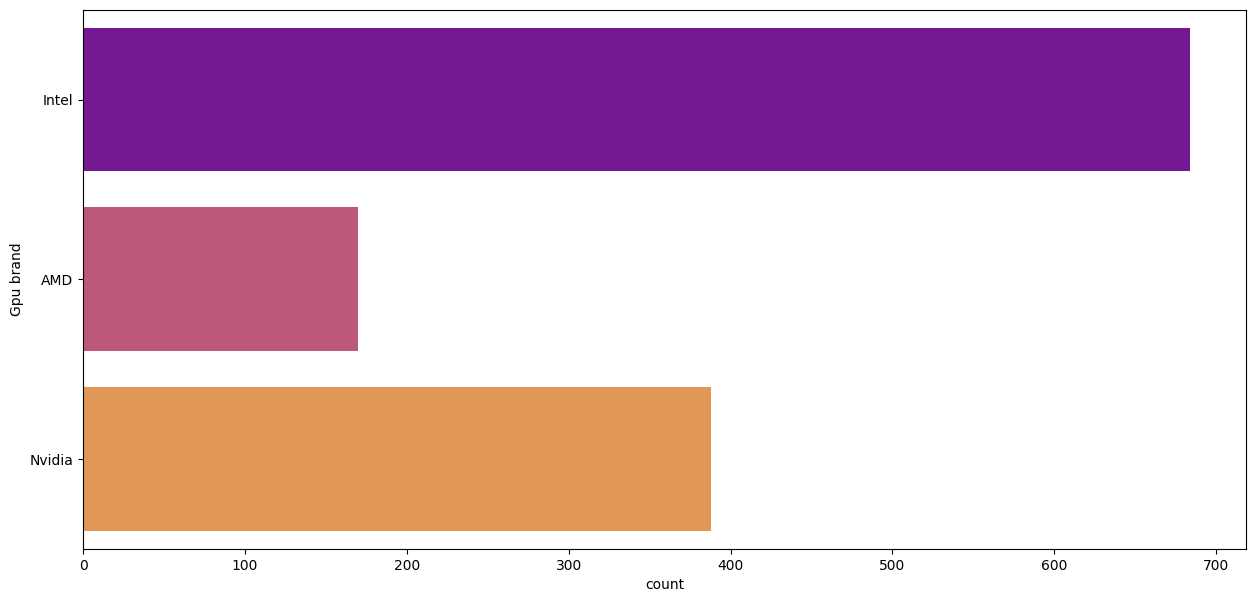

In [ ]:
plt.figure(figsize=(15,7))
df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

I said we can ignore the outliers, but sometimes for fun it will do a great impact on the target analysis. So I used np.median to check if there is any impact or not

here it visualizes the median price of laptops for each GPU brand using a bar plot.






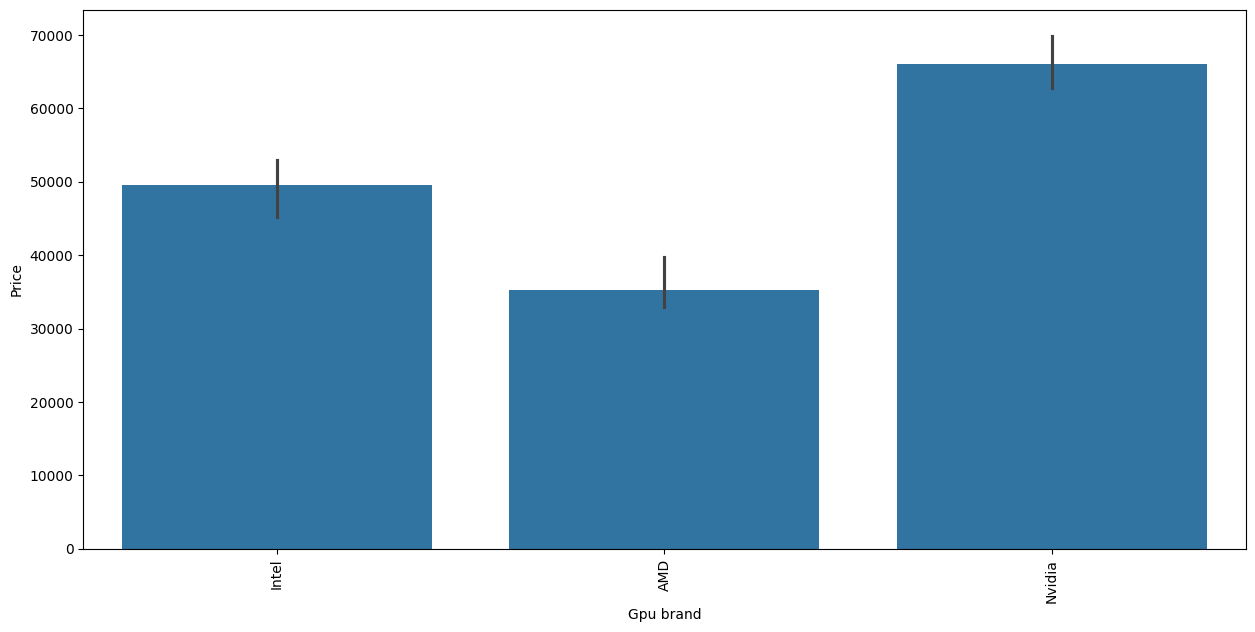

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sn.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


here this data isn’t too overwhelming. Now, we can confidently remove the outdated GPU column...

In [ ]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211990,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel


# Operating System analysis

Operating System (OS) plays a crucial role in a laptop's performance, compatibility, and pricing. Let’s analyze the distribution of different OS types in the dataset.



In [ ]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1021
No OS,63
Linux,57
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


# Barplot - Price variation on OS in laptops

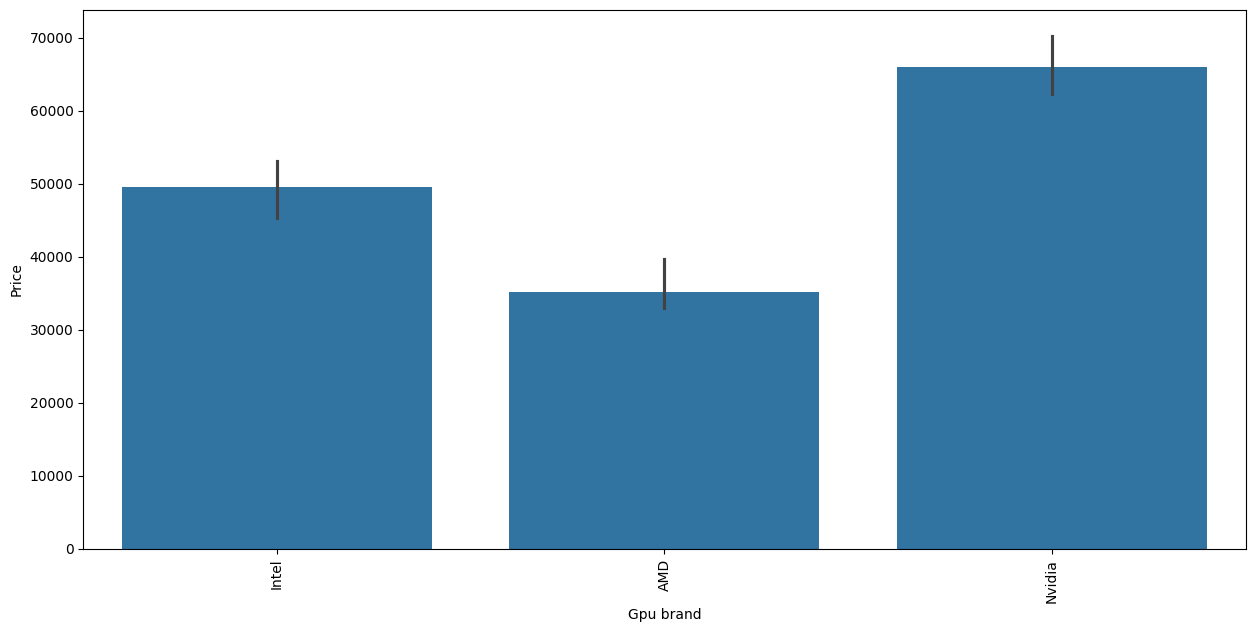

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sn.barplot(x=df['Gpu brand'], y=df['Price'], estimator=np.median)
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,
* club {Windows 10,Windows 7,Windows 7 S}-->Windows
* club {macOS,mac OS X}--> mac
* others --> others

In [ ]:
def setcategory(text):

    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    else:
        return 'Other'


df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211990,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel


In [ ]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
736,HP,Workstation,16,Windows,2.60,128884.32,0,0,141.211990,Intel Core i7,0,256,Nvidia
295,Lenovo,Gaming,8,Windows,3.20,69210.72,0,1,141.211990,Intel Core i7,1000,0,Nvidia
797,Dell,Notebook,8,Windows,1.95,43156.80,0,0,100.454666,Intel Core i5,0,128,Intel
966,Dell,Notebook,4,Windows,1.90,43956.00,0,0,100.454666,Intel Core i5,500,0,Intel
1092,Asus,Gaming,8,Windows,2.70,85194.72,0,1,127.335678,Intel Core i7,1000,256,Nvidia


# Countplot for OS types

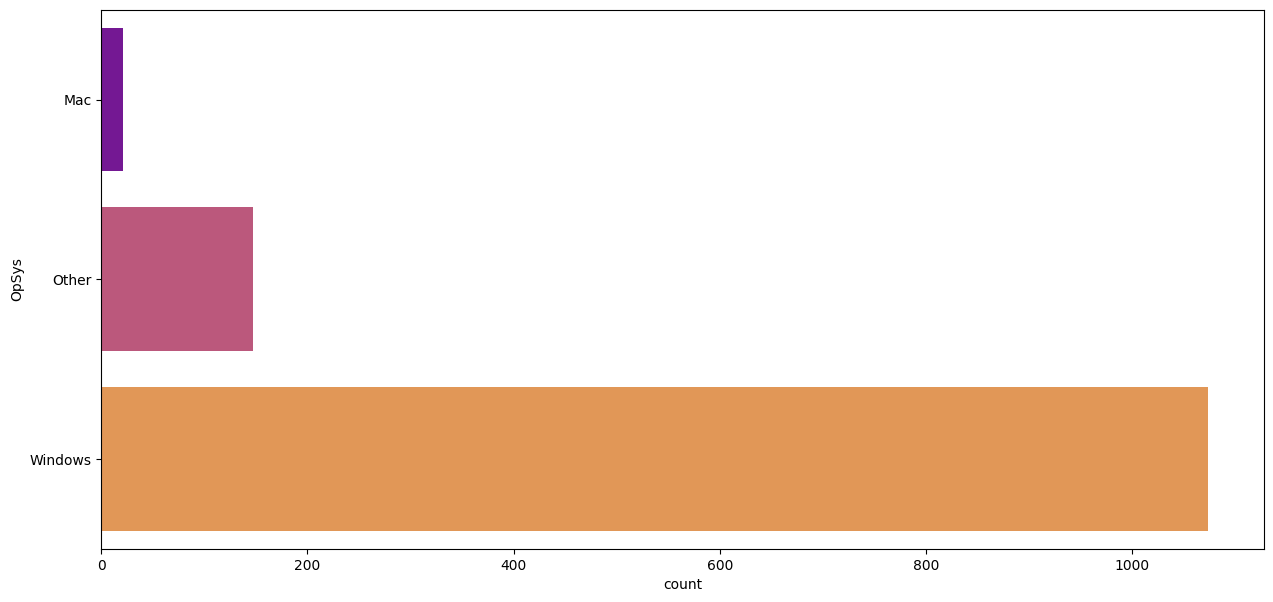

In [ ]:
plt.figure(figsize=(15,7))
sn.countplot(df['OpSys'],palette='plasma')
plt.show()

# Barplot - Price variation on OS types

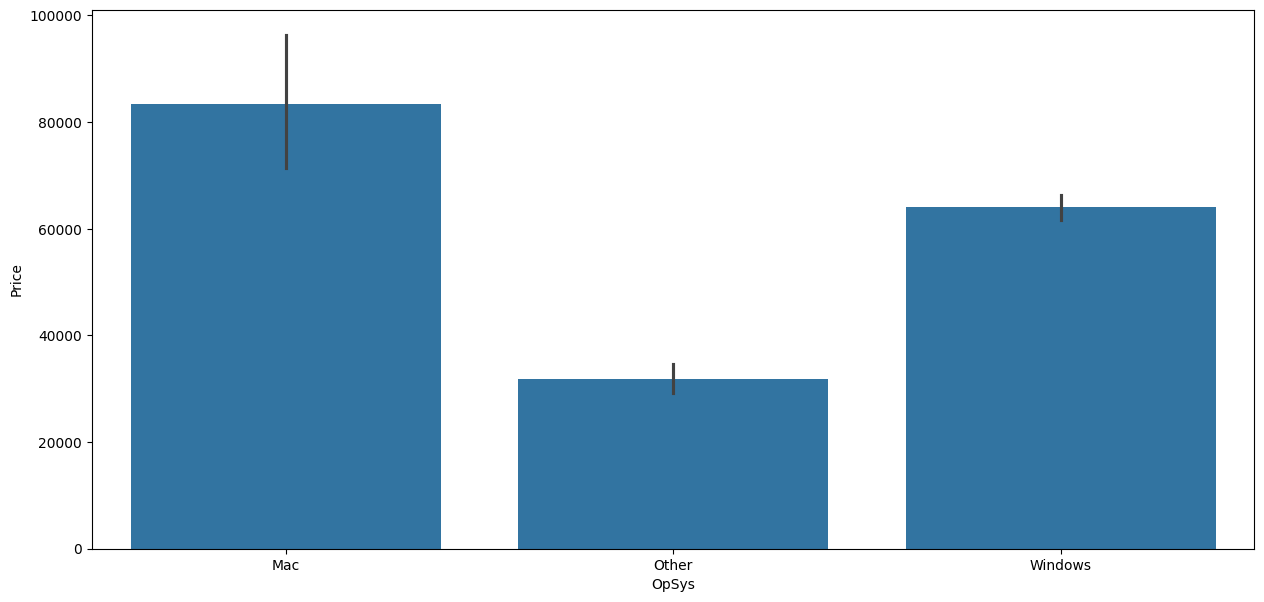

In [ ]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.show()

# Weight analysis

Laptop weight is an important factor that influences portability and usability.

* Distribution plot on weight column

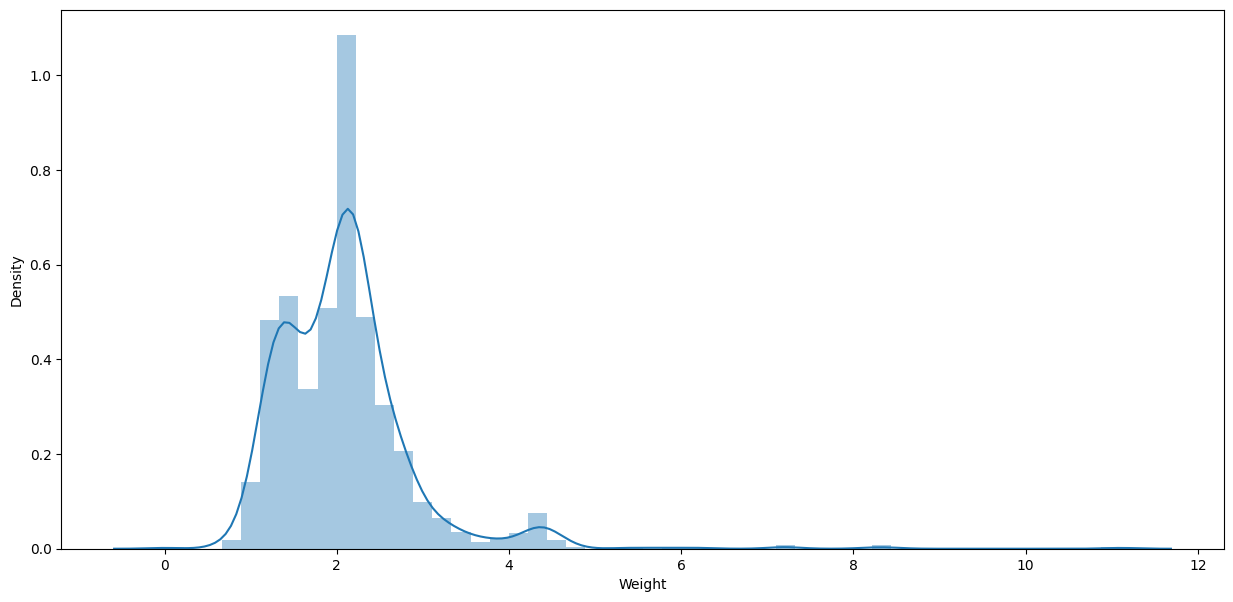

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(df['Weight'])
plt.show()

Scatterplot - Price variation on weight

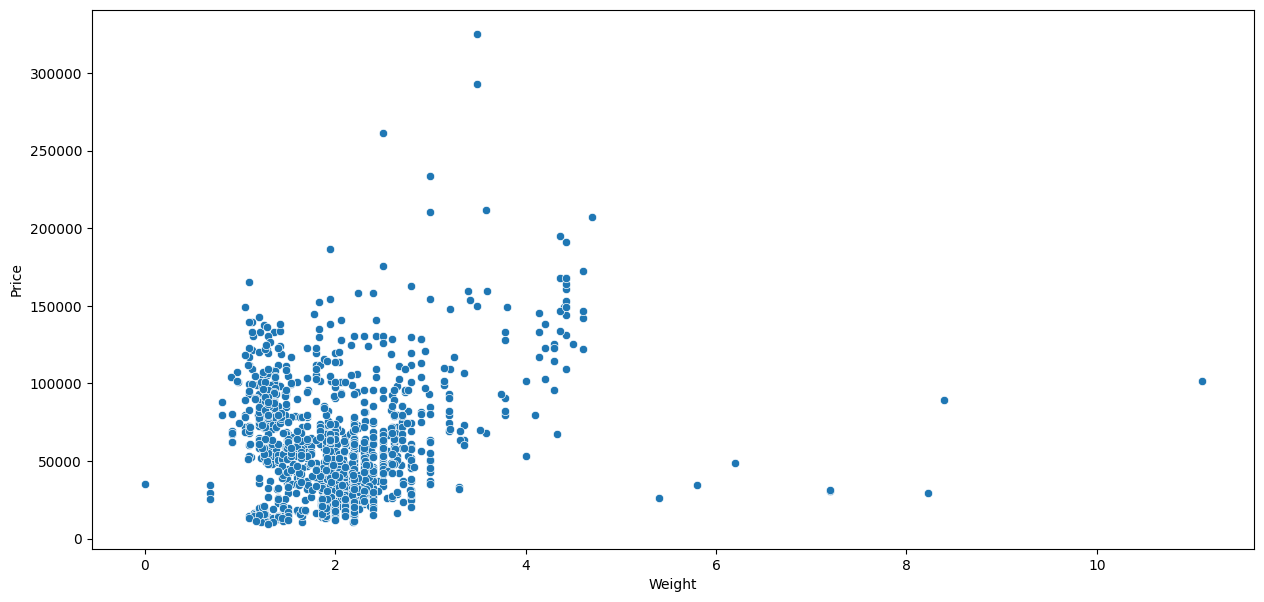

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sn.scatterplot(x=df['Weight'], y=df['Price'])
plt.show()


# Price Analysis

Price is the most crucial factor when buying a laptop. Let's analyze how prices are distributed and what factors influence them.

Distribution plot for Price column

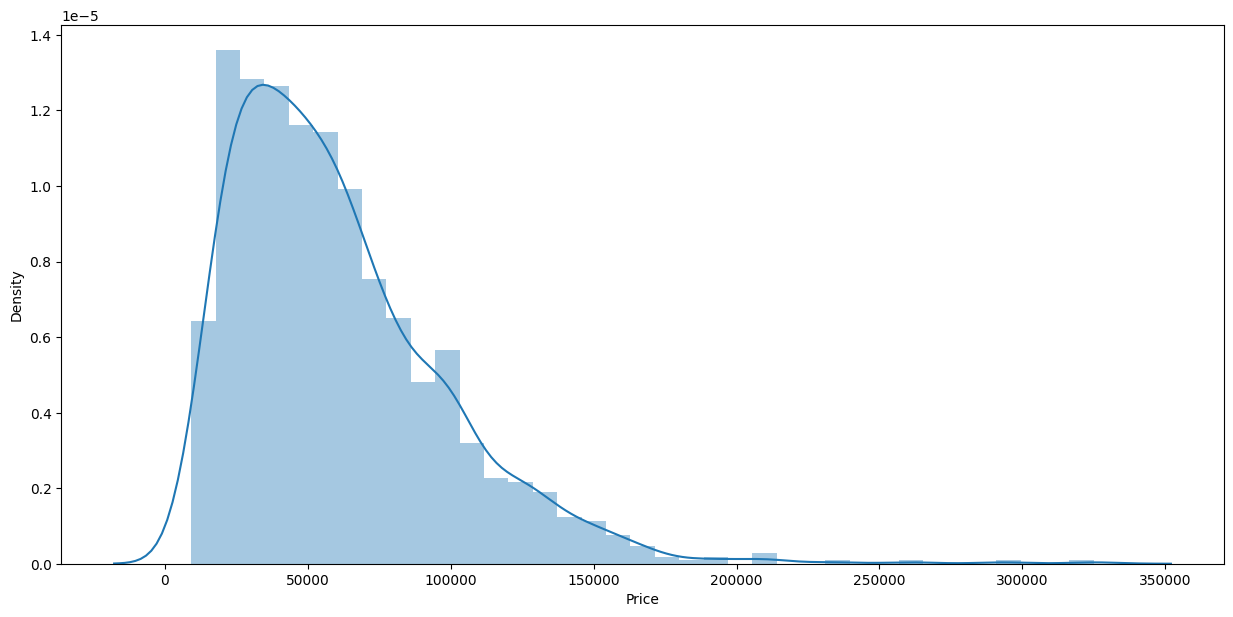

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'])
plt.show()

I applied np.log to the Price column and got a Gaussian distribution(which is s a symmetric, bell-shaped curve.It helps in statistical modeling & machine learning.

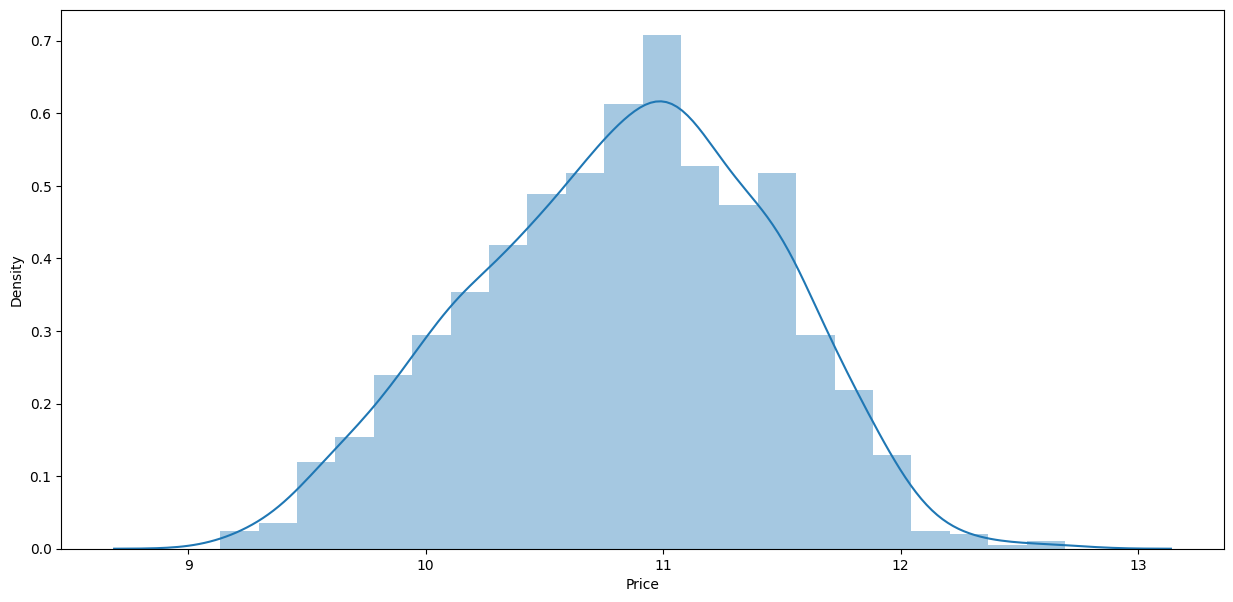

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(np.log(df['Price']))
plt.show()

In [ ]:
# Convert only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation with 'Price'
price_corr = numeric_df.corr()['Price']

print(price_corr)


Ram            0.682826
Weight         0.176609
Price          1.000000
TouchScreen    0.189063
IPS            0.255427
PPI            0.467467
HDD           -0.096486
SSD            0.667743
Name: Price, dtype: float64


# Heatmap - Correlation for each features

A heatmap visually represents the correlation between different features.
It helps us see which features are strongly related to each other.
Values range from -1 to 1:
* 1 → Strong positive correlation (features increase together).
* -1 → Strong negative correlation (one feature increases, the other decreases).
* 0 → No correlation.


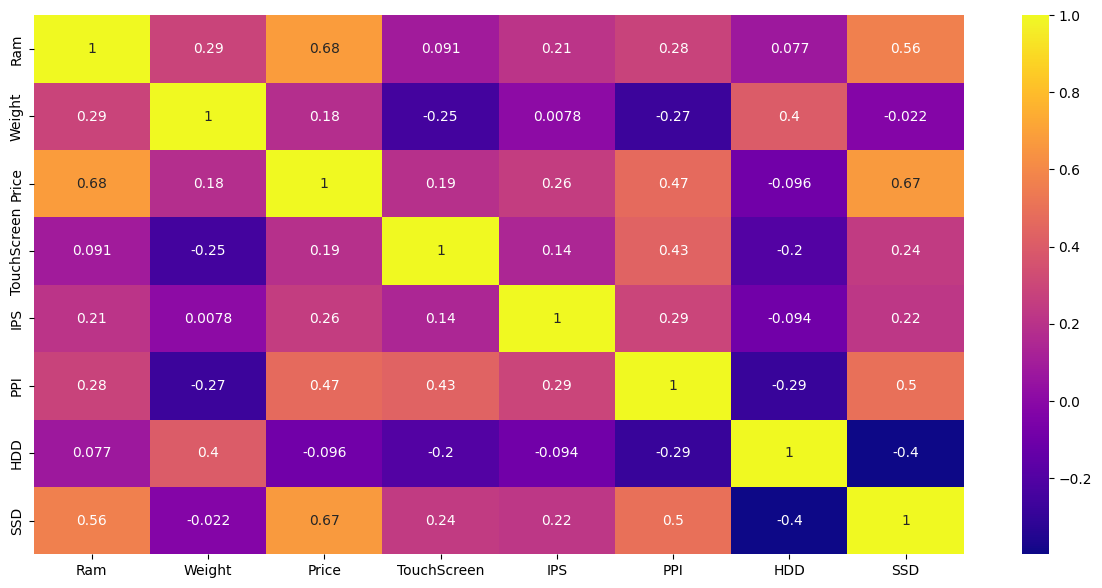

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(15,7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()


# Model Building
Now that we’ve explored and preprocessed our dataset, let’s build a Machine Learning model to predict laptop prices

Splitting the training data and testing data

* Training Set (80%) → Used for model training.
* Testing Set (20%) → Used to evaluate model performance

here,The `Price` column is log-transformed for normalization (`test`), and the rest of the dataset (`train`) is prepared by dropping `Price`.

In [ ]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


This code imports essential libraries for data preprocessing, model selection, training, and evaluation in a laptop price prediction project.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)  # split the dataset into training and testing

X_train.shape,X_test.shape    # checking the shape

((1055, 12), (187, 12))

There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables

Creating a hashmap

Fast Lookups,Easy Updates (Add or change values),Efficient Data Mapping

In [ ]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

# Linear Regression
Linear Regression is a supervised machine learning algorithm used for predicting numerical values based on input features. It finds the best-fitting straight line that represents the relationship between the independent variables (X) and the dependent variable (Y).

We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11] the remainder we keep as passthrough i.e no other col must get effected except the ones undergoing the transformation.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

# Define Model
step2 = LinearRegression()

# Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit Model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate Model
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 Score: 0.7142880475061231
MAE: 0.2420563360870486


**Now mae is 0.24**

In [ ]:
np.exp(0.21)

1.2336780599567432

# Ridge Regression
Ridge Regression is an improved version of Linear Regression that reduces overfitting by adding a penalty (regularization). This helps the model perform better on unseen data.
* Prevents the model from memorizing training data.
* Handles correlated features better.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn import metrics

# Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

# Define Ridge Regression Model - use(Ridge(alpha=10)), which adds L2 regularization.This reduces overfitting by penalizing large coefficients
step2 = Ridge(alpha=10)

# Create Pipeline
pipe = Pipeline([
    ('step1', step1),  #  First step: Convert text data into numbers.
    ('step2', step2)   #  Second step: Train Ridge Regression model.
])

# Fit Model
pipe.fit(X_train, y_train)  # The model learns patterns in the training data.

# Predict
y_pred = pipe.predict(X_test)   # The trained model predicts laptop prices on test data.

# Evaluate Model
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))   # Measures prediction error (lower is better).



R2 Score: 0.7112964568004043
MAE: 0.24219214297404532


# LassoRegression
Lasso Regression is another improved version of Linear Regression that helps in feature selection by making some coefficients exactly zero.Prevents the model from memorizing training data. It uses L1 Regularization, which helps in reducing overfitting.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn import metrics

# Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

# Define Lasso Regression Model
step2 = Lasso(alpha=0.001)

# Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit Model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate Model
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 Score: 0.7112491631011535
MAE: 0.24283651503036993


# Decision Tree
Decision Tree Regression is a tree-based model that predicts a target value by splitting the dataset into branches based on the most important features. It works similarly to a flowchart, making if-else decisions to reach the final prediction.



In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

# Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

# Define Decision Tree Regressor Model
step2 = DecisionTreeRegressor(max_depth=8)  # A Decision Tree Regressor is used for price prediction.max_depth=8 controls the tree depth to prevent overfitting.


# Create Pipeline
pipe = Pipeline([('step1', step1),  # Step 1: Encodes categorical variables.
                ('step2', step2)    # Step 2: Applies the Decision Tree model for price prediction.
])

# Fit Model
pipe.fit(X_train, y_train)     # The model learns patterns from the training data.

# Predict
y_pred = pipe.predict(X_test)   # Uses the trained model to predict laptop prices on test data.

# Evaluate Model
print('R2 Score:', metrics.r2_score(y_test, y_pred))     # R² Score: Measures accuracy (closer to 1 is better).
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # MAE (Mean Absolute Error): Measures prediction error (lower is better).



R2 Score: 0.7861770230142404
MAE: 0.2143094874038119


# Random Forest

This code trains a Random Forest Regression model to predict laptop prices by:

Encoding categorical data with One-Hot Encoding.
Training a Random Forest model with 100 trees and controlled sampling.
Making predictions on the test data.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Define ColumnTransformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 3, 8, 11])
], remainder='passthrough')

# Define Random Forest Regressor Model
step2 = RandomForestRegressor(       # Many Decision Trees working together
    n_estimators=100,                # Uses 100 decision trees
    random_state=3,                  # Ensures reproducibility
    max_samples=0.5,                 # Uses 50% of training data per tree
    max_features=0.75,               # Uses 75% of features per tree
    max_depth=15                     # Limits tree depth to prevent overfitting
)

# Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit Model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate Model
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))


R2 Score: 0.8431006405605982
MAE: 0.18177702022466505


# Pickling the ML pipeline and the data
Pickling is the process of saving a trained model or data so it can be loaded later without retraining. It is useful for deploying models or reusing them in future sessions.



pickle is a Python module used for serializing (saving) and deserializing (loading) objects.
Saves the dataset df into a file named 'df.pkl'.
Mode 'wb' means write in binary mode.
This allows us to reload the dataset later without reading from the original source again.

Saves the trained model pipeline to 'pipe.pkl' so we can reuse it later without retraining.


In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
train.head()  # contains all column except price

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983002,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211990,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534622,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983002,Intel Core i5,0,256,Intel


Saves the train DataFrame as a CSV file named "traineddata.csv" without including the index column.

In [ ]:
train.to_csv('traineddata.csv',index=None)

# Hyperparameter Tuning for Random Forest
Hyperparameter tuning is the process of optimizing the model's parameters to improve performance.



This code extracts specific column names from a dictionary called mapper based on their corresponding index values.



In [ ]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)

transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

This code performs one-hot encoding on specific categorical columns in the dataset.



In [ ]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983002,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211990,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534622,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983002,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False


This code splits the dataset into training and testing sets for machine learning model training.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1055, 38), (187, 38))

This code trains and visualizes a Decision Tree Regressor for predicting the target variable (Price).



[Text(0.4635013381247796, 0.9791666666666666, 'Ram <= 7.0\nsquared_error = 0.387\nsamples = 1055\nvalue = 10.827'),
 Text(0.22133238110454867, 0.9375, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.199\nsamples = 352\nvalue = 10.217'),
 Text(0.34241685961466417, 0.9583333333333333, 'True  '),
 Text(0.1380283630112835, 0.8958333333333334, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.139\nsamples = 254\nvalue = 10.384'),
 Text(0.09788764985895627, 0.8541666666666666, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.086\nsamples = 146\nvalue = 10.214'),
 Text(0.053462182651622, 0.8125, 'Weight <= 1.64\nsquared_error = 0.068\nsamples = 130\nvalue = 10.159'),
 Text(0.007898448519040903, 0.7708333333333334, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.07\nsamples = 9\nvalue = 10.599'),
 Text(0.005641748942172073, 0.7291666666666666, 'Company_Asus <= 0.5\nsquared_error = 0.024\nsamples = 7\nvalue = 10.477'),
 Text(0.004513399153737658, 0.6875, 'Weight <= 1.495\nsquared_error

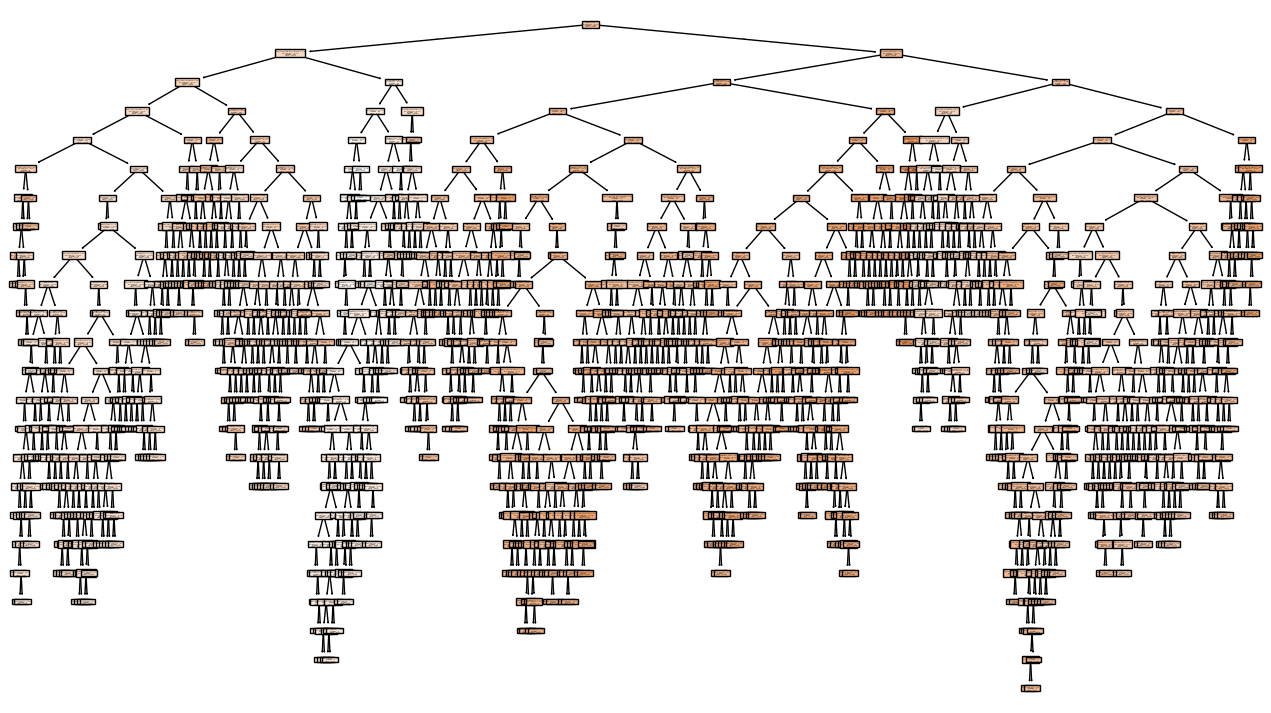

In [ ]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

This code extracts the cost complexity pruning path for a Decision Tree Regressor to optimize its performance.



In [ ]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

This code trains multiple Decision Tree Regressors with different pruning levels using cost complexity pruning (ccp_alpha).



In [ ]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

This code plots the effect of pruning (via ccp_alpha) on the Decision Tree's accuracy.



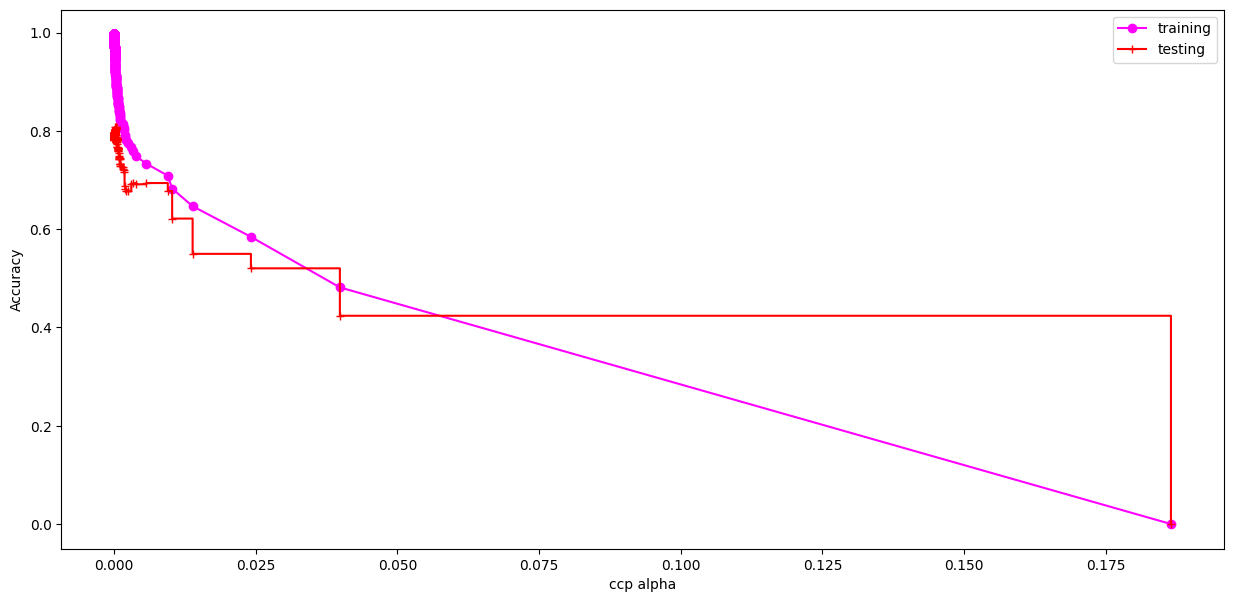

In [ ]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.figure(figsize=(15,7))
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

possible values of alpha can lie between `[0.0025-->0.0075]`

This code trains a pruned Decision Tree model with ccp_alpha = 0.0085 and visualizes the tree structure.

[Text(0.4583333333333333, 0.875, 'Ram <= 7.0\nsquared_error = 0.387\nsamples = 1055\nvalue = 10.827'),
 Text(0.25, 0.625, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.199\nsamples = 352\nvalue = 10.217'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.139\nsamples = 254\nvalue = 10.384'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.086\nsamples = 146\nvalue = 10.214'),
 Text(0.25, 0.125, 'squared_error = 0.118\nsamples = 108\nvalue = 10.615'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.094\nsamples = 98\nvalue = 9.784'),
 Text(0.6666666666666666, 0.625, 'TypeName_Notebook <= 0.5\nsquared_error = 0.202\nsamples = 703\nvalue = 11.133'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Ram <= 14.0\nsquared_error = 0.138\nsamples = 415\nvalue = 11.337'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.101\nsamples = 258\nvalue = 11.19'),
 Text(0.5833333333333334, 0.125, 'sq

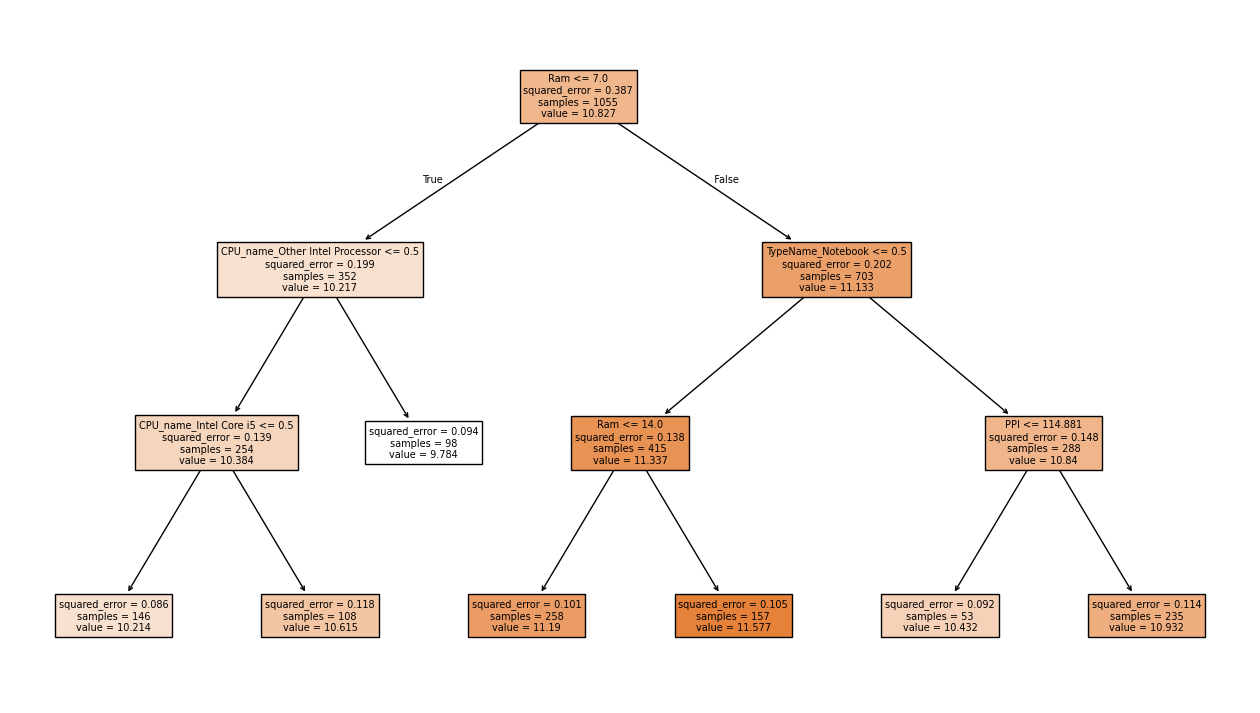

In [ ]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

This code defines hyperparameter grids for Random Forest and Decision Tree models for hyperparameter tuning

In [ ]:
params=  {

    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

This code performs Hyperparameter Tuning using RandomizedSearchCV for Random Forest and Decision Tree models.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

scores = []

# Fixing incorrect criterion names in parameters
for modelname, mp in params.items():
    # Ensure criterion values are correctly named
    if 'criterion' in mp['params']:
        mp['params']['criterion'] = [
            c.replace('mse', 'squared_error').replace('mae', 'absolute_error')
            for c in mp['params']['criterion']
        ]

    clf = RandomizedSearchCV(
        mp['model'],
        param_distributions=mp['params'],
        cv=5,
        n_iter=10,
        scoring='neg_mean_squared_error',
        verbose=2
    )

    clf.fit(X_train, y_train)

    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })

# Print results
for score in scores:
    print(score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   1.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   1.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   1.7s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   1.9s
[CV] END ccp_alpha=0.01, criterion=absolute_error, max_depth=8, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=344; total time=   2.4s
[CV] END ccp_alpha=0.0025, criterion=absolute_error, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=14, n_

This code stores and displays the results from RandomizedSearchCV in a structured table format.



In [ ]:
import pandas as pd

# Example data (this should come from your RandomizedSearchCV results)
scores = [
    {'model_name': 'RandomForest', 'best_score': -0.09836690852825292, 'best_estimator': 'RandomForestRegressor'},
    {'model_name': 'Decision Tree', 'best_score': -0.13285509944642573, 'best_estimator': 'DecisionTreeRegressor'}
]

# Convert the list of dictionaries into a DataFrame
scores_df = pd.DataFrame(scores)

# Display as a table
from tabulate import tabulate  # Import tabulate for better table formatting
print(tabulate(scores_df, headers='keys', tablefmt='pretty'))


+---+---------------+----------------------+-----------------------+
|   |  model_name   |      best_score      |    best_estimator     |
+---+---------------+----------------------+-----------------------+
| 0 | RandomForest  | -0.09836690852825292 | RandomForestRegressor |
| 1 | Decision Tree | -0.13285509944642573 | DecisionTreeRegressor |
+---+---------------+----------------------+-----------------------+


In [ ]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.098367,RandomForestRegressor
1,Decision Tree,-0.132855,DecisionTreeRegressor


The scores list contains dictionaries with model performance results from RandomizedSearchCV. Each dictionary includes:

model_name → Name of the machine learning model (e.g., RandomForest, Decision Tree).
best_score → The best negative mean squared error (lower is better).
best_estimator → The model with the best hyperparameters found.


In [ ]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.09836690852825292,
  'best_estimator': 'RandomForestRegressor'},
 {'model_name': 'Decision Tree',
  'best_score': -0.13285509944642573,
  'best_estimator': 'DecisionTreeRegressor'}]

It looks like you are trying to fit a Random Forest Regressor with specific hyperparameters and evaluate its performance using R² score

In [ ]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8431006405605982


# Prediction on the whole Dataset
To make predictions on the entire dataset using your trained Random Forest Regressor

code is predicting laptop prices for the entire dataset row by row. However, using rf.predict(train) directly is much more efficient than looping through each row.

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

[array([11.21395807]),
 array([11.13248113]),
 array([10.87136022]),
 array([11.54135271]),
 array([11.25489598]),
 array([10.18655406]),
 array([11.53597567]),
 array([11.13248113]),
 array([11.50492341]),
 array([11.10816565]),
 array([10.55470103]),
 array([10.20808056]),
 array([11.54023033]),
 array([10.21498905]),
 array([11.25660127]),
 array([11.25489598]),
 array([10.87832323]),
 array([11.54135271]),
 array([10.70821195]),
 array([11.18757161]),
 array([11.04514475]),
 array([10.18261773]),
 array([11.10836529]),
 array([11.24059692]),
 array([10.18692723]),
 array([11.13248113]),
 array([10.8694055]),
 array([11.17432766]),
 array([10.74779072]),
 array([9.78134454]),
 array([10.23547426]),
 array([10.21219032]),
 array([11.54106585]),
 array([11.13248113]),
 array([9.7807806]),
 array([10.1829909]),
 array([10.84460673]),
 array([10.56008448]),
 array([10.87668821]),
 array([10.20808056]),
 array([11.47191273]),
 array([10.42798731]),
 array([10.5130083]),
 array([11.064650

As we transformed our price variable to np.log, we have to retranform it from np.log-->np.exp inorder to get the result

Your code is applying the exponential function (np.exp) to reverse the logarithmic transformation applied earlier to the prices.

In [ ]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

here,adding the predicted prices back to the original dataframe df in a new column called "Predicted Price". This will allow you to compare the actual and predicted prices side by side.



In [ ]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,74158.359078
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,68355.761291
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211990,Intel Core i5,0,256,Intel,52646.772951
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD,102883.515528
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel,77257.245124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,0,0,100.454666,Intel Core i7,500,0,Nvidia,27386.670175
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350510,Intel Core i7,0,128,Intel,28434.261862
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053528,Intel Core i7,0,512,Intel,102854.006787
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17690.456606


here plotting the distribution of actual vs. predicted prices to visually compare them.

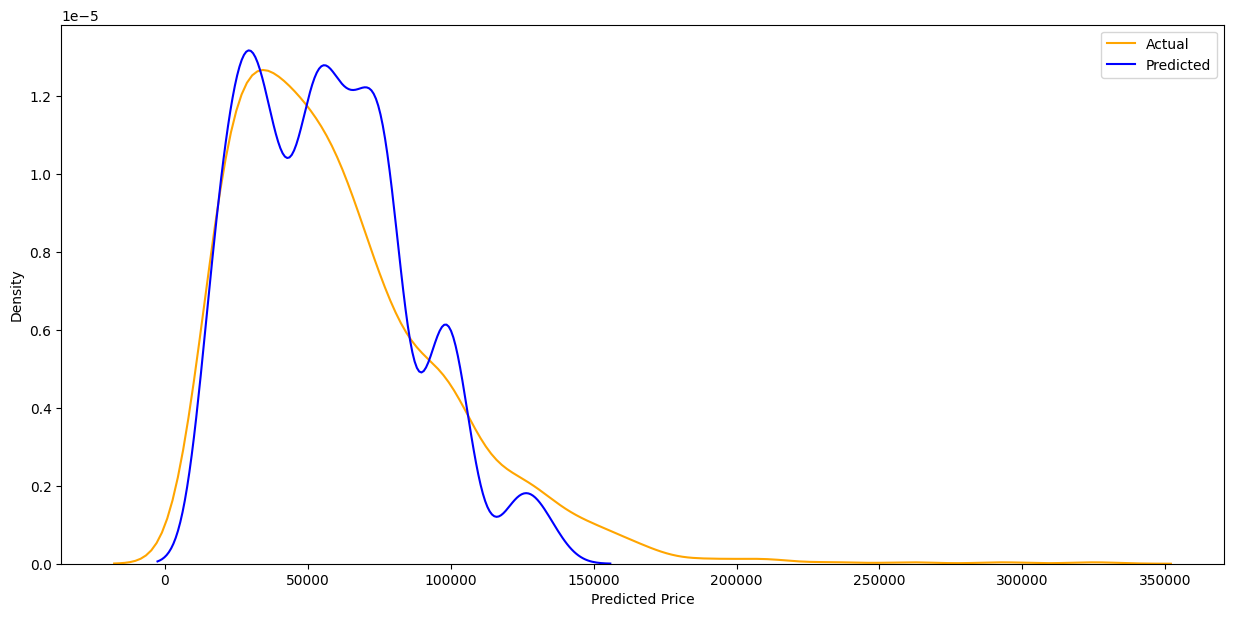

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor - My Version

here training a Random Forest Regressor with custom hyperparameters and evaluating its performance using the R² scor

In [ ]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8441329759101408


 code is predicting values for the entire dataset using the trained Random Forest Regressor (rf1).

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))

predicted

[array([11.16055654]),
 array([10.91224222]),
 array([10.76206526]),
 array([11.77728885]),
 array([11.33219692]),
 array([9.93487905]),
 array([11.44060889]),
 array([10.91224222]),
 array([11.42933945]),
 array([10.80961537]),
 array([10.3043712]),
 array([9.92824363]),
 array([11.70564429]),
 array([10.23778168]),
 array([11.21325562]),
 array([11.33219692]),
 array([10.72039054]),
 array([11.77728885]),
 array([10.36330722]),
 array([11.07311503]),
 array([10.92115726]),
 array([9.82809843]),
 array([10.814619]),
 array([10.95231464]),
 array([10.12825402]),
 array([10.95611736]),
 array([10.68064268]),
 array([11.24161704]),
 array([10.7804514]),
 array([9.60204769]),
 array([9.79278632]),
 array([10.05634187]),
 array([11.53914386]),
 array([10.95611736]),
 array([9.62582961]),
 array([9.93848649]),
 array([10.83570263]),
 array([10.35881079]),
 array([10.77128157]),
 array([10.01264524]),
 array([11.30538403]),
 array([10.35815675]),
 array([10.47505425]),
 array([10.9595003]),


here,code is applying exponential transformation to the predicted values.

In [ ]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

here making a copy of your original DataFrame (df) and adding a new column 'Predicted Price' containing the exponentially transformed predictio

In [ ]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983002,Intel Core i5,0,128,Intel,70302.071374
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,54843.679331
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211990,Intel Core i5,0,256,Intel,47196.039400
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534622,Intel Core i7,0,512,AMD,130260.145399
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983002,Intel Core i5,0,256,Intel,83466.189699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,0,0,100.454666,Intel Core i7,500,0,Nvidia,37002.103757
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350510,Intel Core i7,0,128,Intel,37781.395908
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053528,Intel Core i7,0,512,Intel,92617.541781
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,14109.214296


here plotting the actual vs. predicted prices using Seaborn's distplot to compare their distributions.

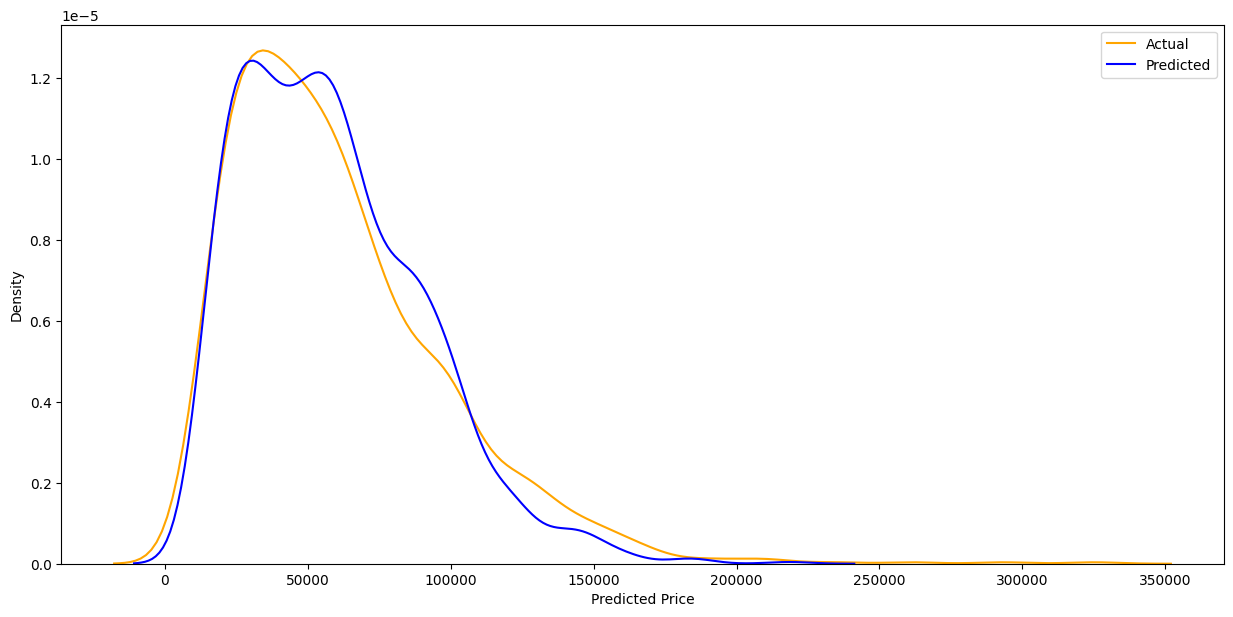

In [ ]:
plt.figure(figsize=(15,7))
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Pickling our version of model
here about to save (pickle) here custom Random Forest model so it can be reused later without retraining.

here successfully saved our Random Forest model (rf1) as laptoppricepredictor.pkl

In [ ]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

Now your trained model is ready for deployment or further analysis.


# Questions to Explore:
## 1.Which features have the most significant impact on laptop prices?

Features That Significantly Impact Laptop Prices:
* RAM: Strong positive correlation (more RAM → higher price).
* CPU Speed: Faster processors correlate with higher prices.
* SSD Storage: Laptops with SSDs tend to be significantly more expensive than
 HDD-only models.
* Brand Influence: Apple laptops are the most expensive, followed by premium models from Dell, HP, and Lenovo.

# 2.Can the model accurately predict the prices of laptops from lesser-known brands?

* The dataset contains brands like Apple, Dell, HP, Lenovo, and Acer, which dominate the market.
* Lesser-known brands might have unpredictable pricing due to lower market representation.
* A well-trained model can make reasonable predictions, but accuracy may be lower for brands with fewer samples.
Solution: Adding more data from smaller brands can improve predictions.

# 3.Does the brand of the laptop significantly influence its price?

Yes, brand reputation plays a major role in pricing.

* Apple laptops are consistently more expensive, even with similar specifications.
* Razer and Microsoft Surface devices also command high prices.
* Lenovo, HP, and Dell have mid-to-high price ranges.
* Acer and Toshiba tend to have lower-priced laptops.
* Conclusion: Brand perception and customer loyalty contribute significantly to price differences beyond just hardware specifications.

# 4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

* High-end laptops (gaming, ultrabooks) have more variability in pricing due to premium design and build quality.
* Budget laptops have more standardized pricing, making them easier to predict.
* Prediction accuracy is likely higher for budget laptops and slightly lower for premium models where branding and additional features play a role.

# 5.What are the limitations and challenges in predicting laptop prices accurately?

* Market Fluctuations: Prices change over time due to new model releases and discounts.
* Limited Data on Lesser-Known Brands: Fewer samples make it harder to generalize for all brands.
* Feature Representation: Some factors like build quality, battery life, and special features aren't quantified in the dataset but impact price.
* New Laptop Models: The model may struggle with entirely new configurations that aren't seen in training data.

# 6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

* Potential issue: The model may not generalize well for brand-new laptops.
* Solution: Regular updates with new data can improve predictions.
* Using external sources (market trends, competitor pricing) can also refine predictions for unseen laptops.